# 0. Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import time

# 1. Entendimento do Negócio

A RetaiX emprega cerca de 4000 funcionários. No entanto, todos os anos, cerca de 15% de seus funcionários deixam a empresa e precisam ser substituídos por novos funcionários que estão disponíveis no mercado. A gestão acredita que esse nível de rotatividade (funcionários saindo, seja por vontade própria ou porque foram demitidos) é ruim para a empresa, pelos seguintes motivos:

Dificuldade no cumprimento dos prazos, resultando em perda de reputação entre consumidores e parceiros.
Um departamento considerável precisa ser mantido para fins de recrutamento de novos talentos.
Na maioria das vezes, os novos funcionários precisam ser treinados para o trabalho e/ou precisam de tempo para se ambientarem à empresa.
Por outro lado, a RetailX também percebeu que poderia melhorar o relacionamento com os clientes, por meio do entendimento do comportamento de compra deles. A empresa possui dados de campanhas, compras, cadastro e até da renda de cada cliente.

Diante deste cenário a empresa decidiu investir em dois projetos:
* Projeto de RH;
* Projeto de CRM.

Neste momento, focaremos no Projeto de RH. A seguir estão dispostas as demandas:
* Análise dos dados para entender padrões de comportamentos dos funcionários (obter personas);
* Análise dos dados para entender as variáveis que mais influenciam na alta rotatividade dos funcionários;
* Obter a probabilidade de um funcionário sair da empresa e com isso as variáveis que mais impactam o aumento da probabilidade de saída;
* Gerar um relatório com as conclusões para que o gestor do RH possa tomar as devidas providências para que a rotatividade seja reduzida.

# 2. Entendimento dos Dados

### 2.1 Leitura da Base de Funcionários

In [ ]:
df_funcionarios = pd.read_csv('/content/tb_funcionarios.csv')
df_funcionarios.head()

,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,...,NumeroDeEmpresas,MaiorDe18,AumentoPercentualSalario,HorasPadrao,NivelDeOpcaoDeCompraDeAcoes,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,...,4.0,Y,12,8,2,9.0,2,6,0,4


### 2.2 Leitura da Base de Pesquisa dos Funcionários

In [ ]:
df_pesquisa_funcionarios = pd.read_csv('/content/tb_pesquisa_funcionarios.csv')
df_pesquisa_funcionarios.head()


,IDDoEmpregado,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


### 2.3 Leitura da Base de Pesquisa dos Gestores

In [ ]:
df_pesquisa_gestores = pd.read_csv('/content/tb_pesquisa_gestores.csv')
df_pesquisa_gestores.head()

,IDDoEmpregado,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


## 2.4 Join entre tabelas

In [ ]:
df_aux1 = pd.merge(df_funcionarios, df_pesquisa_funcionarios, on='IDDoEmpregado', how='left')
df_publico = pd.merge(df_aux1, df_pesquisa_gestores, on='IDDoEmpregado', how='left')
df_publico.head()

,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,...,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


## 2.5 Análise da Base do Estudo

Nesse primeiro momento, analisa-se os tipos de cada variável assim como preenchimento e cardinalidade.

In [ ]:
# Metadados referente ao conjunto de dados
def pod_academy_generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
pod_academy_generate_metadata(df_publico)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,EquilibrioTrabalhoVida,float64,38,0.86,4
1,SatisfacaoComAmbiente,float64,25,0.57,4
2,SatisfacaoNoTrabalho,float64,20,0.45,4
3,NumeroDeEmpresas,float64,19,0.43,10
4,TotalDeAnosTrabalhados,float64,9,0.20,40
5,MaiorDe18,object,0,0.00,1
6,EnvolvimentoNoTrabalho,int64,0,0.00,4
7,AnosComAtualGestor,int64,0,0.00,18
8,AnosDesdeUltimaPromocao,int64,0,0.00,16
9,AnosNaEmpresa,int64,0,0.00,37


Outro ponto bastante relevante no desenvolvimento de um estudo é buscar entender as principais características do público alvo. Dessa forma, esta seção será focada em obter essas informações.

#### 2.5.1 Estatística Descritiva

In [ ]:
df_publico.describe()

,Idade,DistanciaDeCasa,Educacao,ContagemDeEmpregados,IDDoEmpregado,NivelDoCargo,RendaMensal,NumeroDeEmpresas,AumentoPercentualSalario,HorasPadrao,...,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,13005.862585,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,9413.777712,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,2018.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,5822.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,9838.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,16760.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,39998.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


#### 2.5.2 Volume da Base

Percebe-se pela análise do metadados que a variável que identificada cada funcionário (IDDoEmpregado) possui 4410 entradas e nenhum missing. Dessa forma, nota-se que o volume da base é 4410 funcionários.

#### 2.5.3 Taxa de Rotatividade

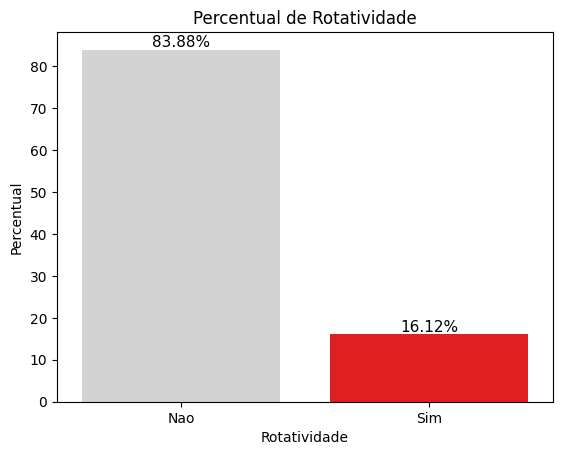

In [ ]:
rotatividade_counts = df_publico['Rotatividade'].value_counts()

# Calculando os percentuais de rotatividade
percent_nao = (rotatividade_counts['Nao'] / len(df_publico)) * 100
percent_sim = (rotatividade_counts['Sim'] / len(df_publico)) * 100

# Criando o DataFrame total_by_rotatividade
total_by_rotatividade = pd.DataFrame({'Rotatividade': ['Nao', 'Sim'], 'Percent': [percent_nao, percent_sim]})

# Definindo as cores
cores = {'Nao': 'lightgrey', 'Sim': 'red'}

# Plotando o gráfico de barras com seaborn
ax = sns.barplot(x='Rotatividade', y='Percent', hue='Rotatividade', data=total_by_rotatividade, palette=cores, dodge=False)

# Adicionando os valores de cada barra com símbolo de porcentagem
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Rotatividade')
plt.ylabel('Percentual')
plt.title('Percentual de Rotatividade')
plt.show()

Verifica-se que a taxa de rotatividade nesta base é 16,12%.

#### 2.5.4 Distribuição de Idade e Taxa de Rotatividade por Faixa de Idade

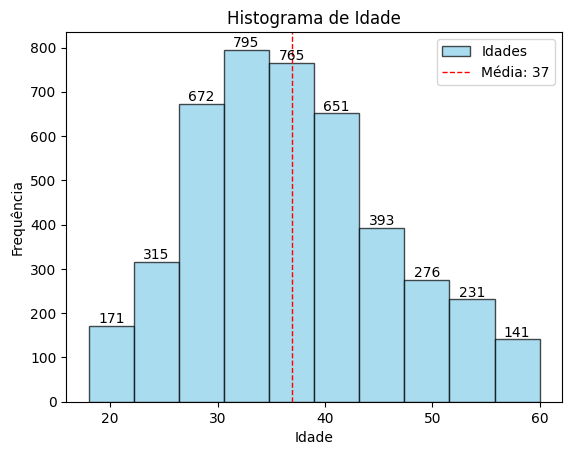

In [ ]:
import matplotlib.pyplot as plt

# Plotando o histograma das idades
hist, bins, _ = plt.hist(df_publico['Idade'], bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='Idades')

# Calculando a média das idades
media_idades = df_publico['Idade'].mean()

# Adicionando a linha vertical para a média
plt.axvline(media_idades, color='red', linestyle='dashed', linewidth=1)
plt.legend(['Idades', 'Média: {:.0f}'.format(media_idades)], loc='upper right')

# Adicionando os valores da frequência em cada barra
for i in range(len(hist)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], str(int(hist[i])), ha='center', va='bottom')

# Configurando os rótulos e título
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade')

# Mostrando o gráfico
plt.show()

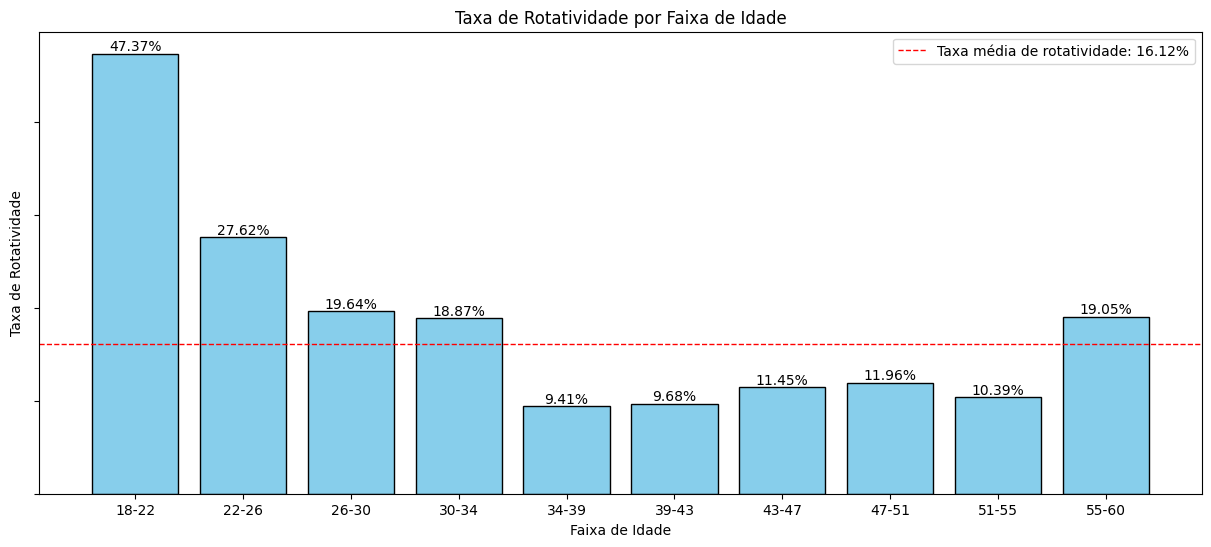

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Calculando o histograma das idades com os mesmos bins do histograma anterior
hist, bins = np.histogram(df_publico['Idade'], bins=10)

# Calculando a taxa de rotatividade para cada faixa de idade
taxa_rotatividade_por_faixa = []
for i in range(len(bins)-1):
    faixa_inferior = bins[i]
    faixa_superior = bins[i+1]
    taxa_rotatividade = df_publico[(df_publico['Idade'] >= faixa_inferior) & (df_publico['Idade'] < faixa_superior)]['Rotatividade'].value_counts(normalize=True).get('Sim', 0)
    taxa_rotatividade_por_faixa.append(taxa_rotatividade)

# Calculando a média da variável de rotatividade
taxa_media_rotatividade = df_publico['Rotatividade'].value_counts(normalize=True).get('Sim', 0)

# Plotando o gráfico de barras
plt.figure(figsize=(15,6))
plt.bar(range(len(bins)-1), taxa_rotatividade_por_faixa, color='skyblue', edgecolor='black')

# Adicionando os valores das taxas de rotatividade nas barras
for i, taxa in enumerate(taxa_rotatividade_por_faixa):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

# Adicionando uma linha indicando a média da variável de rotatividade
plt.axhline(taxa_media_rotatividade, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade: {:.2f}%'.format(taxa_media_rotatividade * 100))

# Adicionando as faixas de idade no eixo x
plt.xticks(range(len(bins)-1), ['{}-{}'.format(int(faixa_inf), int(faixa_sup)) for faixa_inf, faixa_sup in zip(bins[:-1], bins[1:])])

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando rótulos e título
plt.xlabel('Faixa de Idade')
plt.ylabel('Taxa de Rotatividade')
plt.title('Taxa de Rotatividade por Faixa de Idade')

# Adicionando a legenda
plt.legend()

# Mostrando o gráfico
plt.show()

Nota-se que:
* A idade mínima e máxima são respectivamente 18 e 60 anos;
* As duas faixas de idade com maior quantidade de funcionários são: 30-34 e 34-39 anos;
* Os funcionários da faixa de 18 a 22 anos são os que possuem maior taxa de rotatividade na empresa;
* As taxas de rotatividade são mais elevadas no público mais jovem, especificamente de 18 a 34 anos. Nas faixas de 34 a 55 anos apresenta uma redução significativa na taxa de rotatividade e volta a subir na última faixa de idade (55 a 60 anos).

Lembrar do critério de aposentadoria (2024):
* Tempo de Contribuição:
  *   Homens: 35 anos de contribuição;
  *   Mulheres: 30 anos de contribuição.
* Idade:
  *   Homens: 65 anos + 15 anos de contribuição;
  *   Mulheres: 62 anos + 15 anos de contribuição.

#### 2.5.5 Percentual de Funcionários por Gênero e Taxa de Rotatividade por Gênero

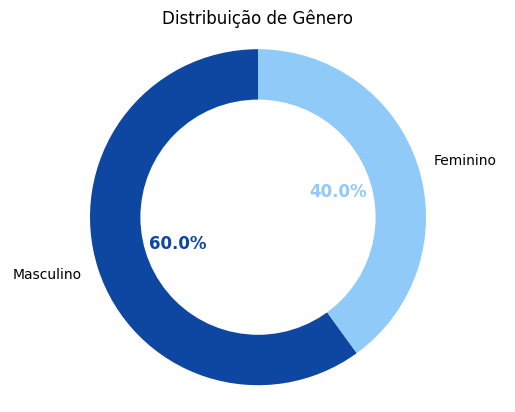

In [ ]:
# Contando os valores únicos da variável 'Genero'
genero_counts = df_publico['Genero'].value_counts()

# Definindo os rótulos e os tamanhos das fatias
labels = genero_counts.index
sizes = genero_counts.values

# Cores das fatiasQ
cores = ['#0D47A1', '#90CAF9']  # Defina as cores correspondentes a cada seção

# Criando o donut chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90,
                                  pctdistance=0.5)  # Define a distância dos valores percentuais do centro

# Adicionando um círculo no meio para transformar em donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Configurando o aspecto do gráfico
ax.axis('equal')

# Ajustando a posição e cor dos valores percentuais
for autotext, color in zip(autotexts, cores):
    autotext.set_color(color)  # Define a cor dos valores percentuais
    autotext.set_fontsize(12)  # Define o tamanho da fonte dos valores percentuais
    autotext.set_fontweight('bold')  # Define o peso da fonte dos valores percentuais

# Título
plt.title('Distribuição de Gênero')

# Mostrando o gráfico
plt.show()

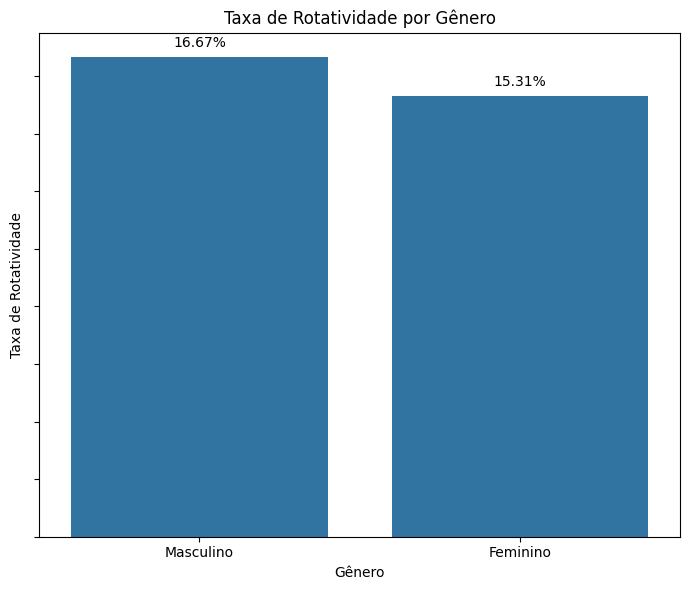

In [ ]:
import matplotlib.pyplot as plt

# Calculando a taxa de rotatividade para cada gênero
taxa_rotatividade_por_genero = df_publico.groupby('Genero')['Rotatividade'].apply(lambda x: (x == 'Sim').mean())

# Ordenando os gêneros por taxa de rotatividade
generos_ordenados = taxa_rotatividade_por_genero.sort_values(ascending=False)

plt.figure(figsize=(7,6))

# Plotando o gráfico de barras com cor azul
ax = sns.barplot(x=generos_ordenados.index, y=generos_ordenados.values)

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])
plt.xlabel('Gênero')
plt.ylabel('Taxa de Rotatividade')
plt.title('Taxa de Rotatividade por Gênero')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

Verifica-se que:
* 60% dos funcionários são do gênero masculino enquanto 40% são do gênero feminino;
* Os funcionários do gênero masculino apresentam uma taxa de rotatividade um pouco mais elevada que as funcionárias do gênero feminino.

#### 2.5.6 Quantidade de Funcionários por Função e Taxa de Rotatividade por Função

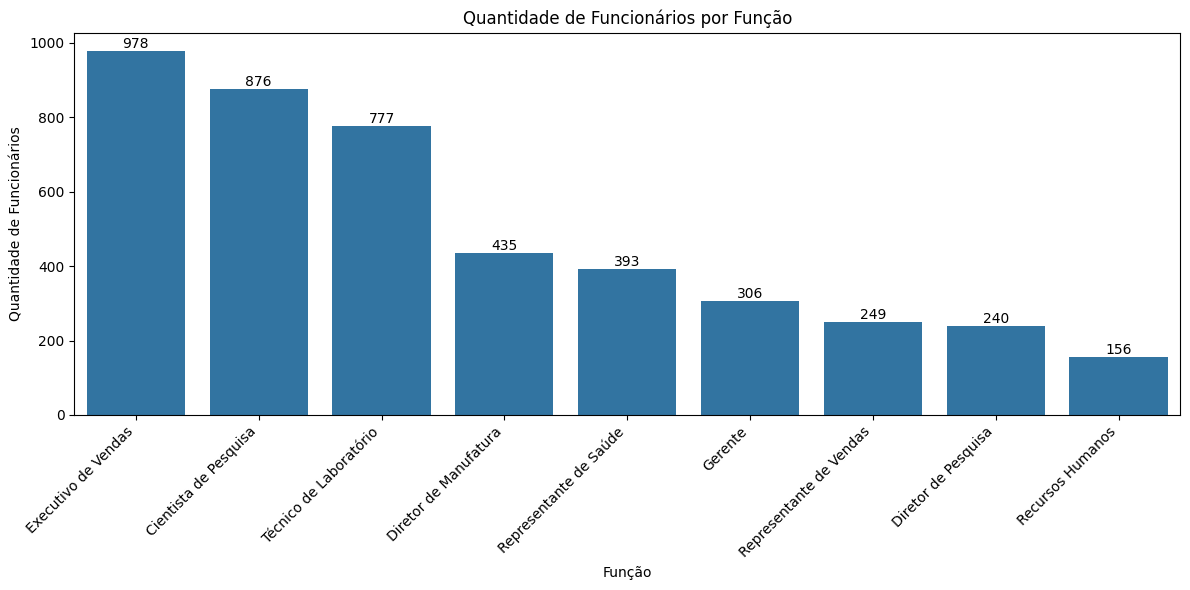

In [ ]:
# Contando as ocorrências de cada categoria na variável 'Funcao' e ordenando em ordem decrescente
funcao_counts = df_publico['Funcao'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))

# Plotando o gráfico de barras com seaborn e deixando o Seaborn gerenciar as cores
ax = sns.countplot(x='Funcao', data=df_publico, order=funcao_counts.index)

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Função')
plt.ylabel('Quantidade de Funcionários')
plt.title('Quantidade de Funcionários por Função')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

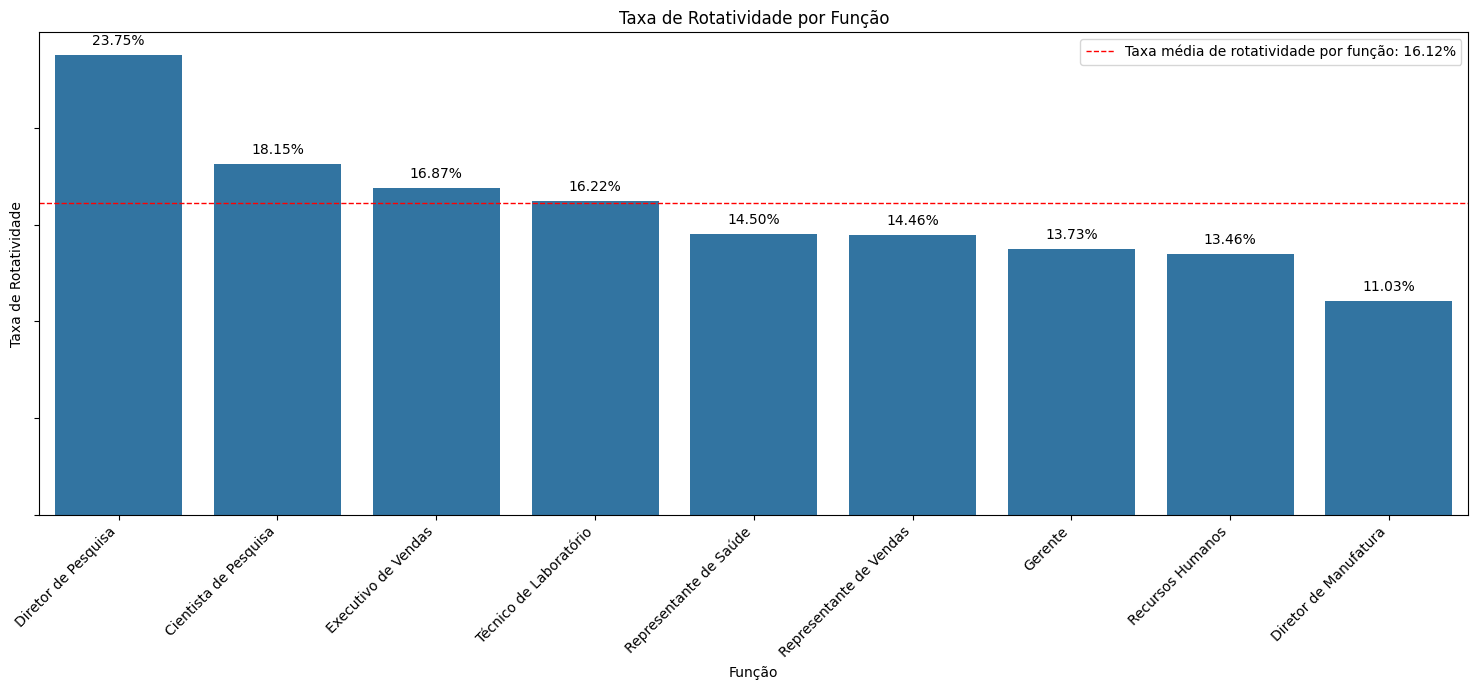

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculando a taxa de rotatividade para cada função
taxa_rotatividade_por_funcao = df_publico.groupby('Funcao')['Rotatividade'].apply(lambda x: (x == 'Sim').mean())

# Ordenando as funções por taxa de rotatividade
funcoes_ordenadas = taxa_rotatividade_por_funcao.sort_values(ascending=False)

plt.figure(figsize=(15,7))

# Plotando o gráfico de barras com cor azul
ax = sns.barplot(x=funcoes_ordenadas.index, y=funcoes_ordenadas.values)

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando uma linha indicando a taxa média de rotatividade
taxa_media_rotatividade_funcao = df_publico['Rotatividade'].value_counts(normalize=True).get('Sim', 0)
plt.axhline(taxa_media_rotatividade_funcao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade por função: {:.2f}%'.format(taxa_media_rotatividade_funcao * 100))

plt.xlabel('Função')
plt.ylabel('Taxa de Rotatividade')
plt.title('Taxa de Rotatividade por Função')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionando a legenda
plt.legend()

plt.show()

Observa-se que:
* As três funções que concentram quase 60% do total de funcionários são: Executivo de Vendas, Cientista de Pesquisa e Técnico de Laboratório;
* A função com maior taxa de rotatividade é Diretor de Pesquisa, apresentando taxa bem maior que a média na empresa;
* Diretor de Manufatura é a função com menor taxa de rotatividade na RetailX.

#### 2.5.7 Distribuição de Renda Mensal e Taxa de Rotatividade por Faixa de Renda Mensal

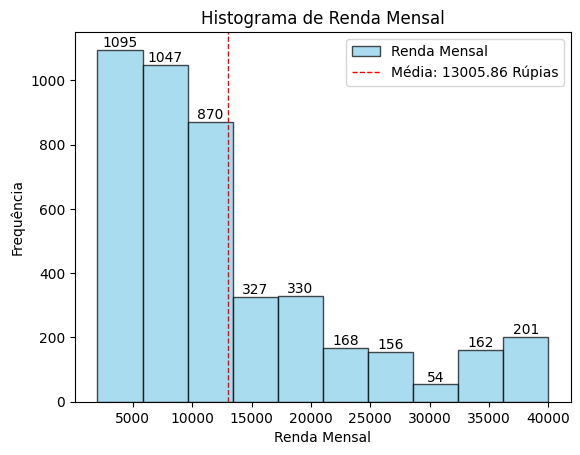

In [ ]:
import matplotlib.pyplot as plt

# Plotando o histograma das rendas mensais
hist, bins, _ = plt.hist(df_publico['RendaMensal'], bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='Renda Mensal')

# Calculando a média das rendas mensais
media_renda = df_publico['RendaMensal'].mean()

# Adicionando a linha vertical para a média
plt.axvline(media_renda, color='red', linestyle='dashed', linewidth=1)
plt.legend(['Renda Mensal', 'Média: {:.2f} Rúpias'.format(media_renda)], loc='upper right')

# Adicionando os valores da frequência em cada barra
for i in range(len(hist)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], str(int(hist[i])), ha='center', va='bottom')

# Configurando os rótulos e título
plt.xlabel('Renda Mensal')
plt.ylabel('Frequência')
plt.title('Histograma de Renda Mensal')

# Mostrando o gráfico
plt.show()

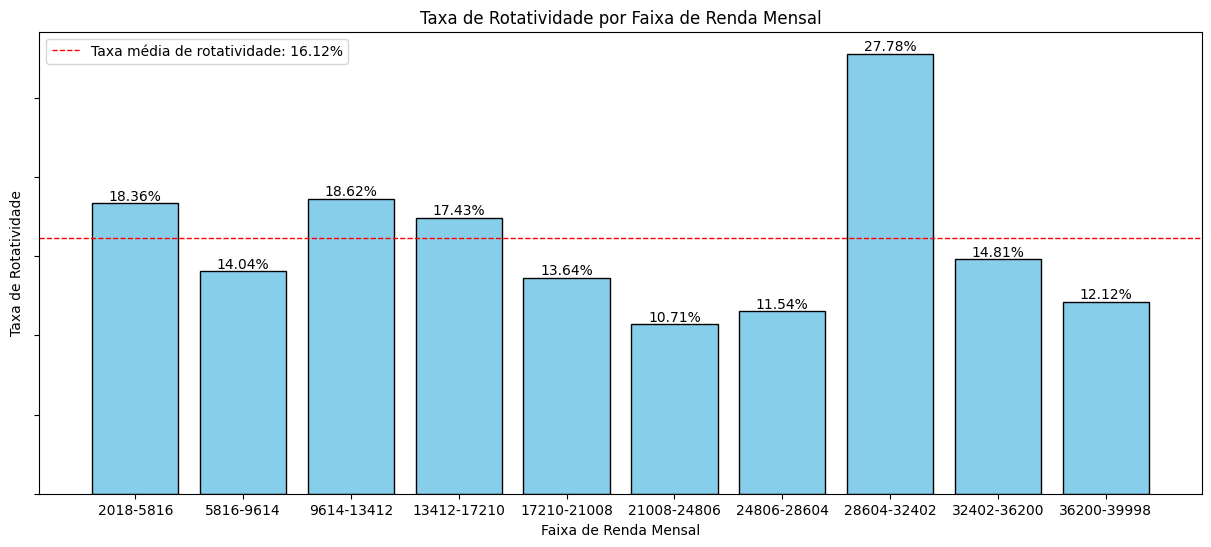

In [ ]:
import matplotlib.pyplot as plt

# Calculando o histograma das rendas mensais com os mesmos bins do histograma anterior
hist, bins = np.histogram(df_publico['RendaMensal'], bins=10)

# Calculando a taxa de rotatividade para cada faixa de renda mensal
taxa_rotatividade_por_faixa = []
for i in range(len(bins)-1):
    faixa_inferior = bins[i]
    faixa_superior = bins[i+1]
    taxa_rotatividade = df_publico[(df_publico['RendaMensal'] >= faixa_inferior) & (df_publico['RendaMensal'] < faixa_superior)]['Rotatividade'].value_counts(normalize=True).get('Sim', 0)
    taxa_rotatividade_por_faixa.append(taxa_rotatividade)

# Calculando a média da variável de rotatividade
taxa_media_rotatividade = df_publico['Rotatividade'].value_counts(normalize=True).get('Sim', 0)

# Plotando o gráfico de barras
plt.figure(figsize=(15,6))
plt.bar(range(len(bins)-1), taxa_rotatividade_por_faixa, color='skyblue', edgecolor='black')

# Adicionando os valores das taxas de rotatividade nas barras
for i, taxa in enumerate(taxa_rotatividade_por_faixa):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

# Adicionando uma linha indicando a média da variável de rotatividade
plt.axhline(taxa_media_rotatividade, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade: {:.2f}%'.format(taxa_media_rotatividade * 100))

# Adicionando as faixas de renda mensal no eixo x
plt.xticks(range(len(bins)-1), ['{}-{}'.format(int(faixa_inf), int(faixa_sup)) for faixa_inf, faixa_sup in zip(bins[:-1], bins[1:])])

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando rótulos e título
plt.xlabel('Faixa de Renda Mensal')
plt.ylabel('Taxa de Rotatividade')
plt.title('Taxa de Rotatividade por Faixa de Renda Mensal')

# Adicionando a legenda
plt.legend()

# Mostrando o gráfico
plt.show()

Nota-se que:
* A maior parte dos funcionários (68%) tem uma renda mensal de até 13412 rúpias;
* Não há uma relação monotônica entre a faixa de renda e a taxa de rotatividade;
* A faixa de 28604 a 32402 rúpias, correspondente a 1,2% do público, apresenta uma taxa de rotatividade bem acima das demais faixas.

# 3. Criação de Variáveis

In [ ]:
import pandas as pd
import numpy as np

# Supondo que você já tenha o DataFrame df_publico

# Tempo Médio em Cada Empresa
df_publico['TempoMedioPorEmpresa'] = df_publico['TotalDeAnosTrabalhados'] / df_publico['NumeroDeEmpresas'].replace({0: np.nan})

# Taxa de Promoção
df_publico['TaxaPromocao'] = df_publico['AnosDesdeUltimaPromocao'] / df_publico['TotalDeAnosTrabalhados'].replace({0: np.nan})

# Taxa de Rotatividade Relativa
df_publico['TaxaRotatividadeRelativa'] = df_publico['AnosNaEmpresa'] / df_publico['TotalDeAnosTrabalhados'].replace({0: np.nan})


# Experiência Relativa no Cargo Atual
df_publico['ExperienciaCargoAtual'] = df_publico['AnosComAtualGestor'] / df_publico['AnosNaEmpresa'].replace({0: np.nan})

# Satisfação Geral
df_publico['SatisfacaoGeral'] = (df_publico['SatisfacaoComAmbiente'] + df_publico['SatisfacaoNoTrabalho'] + df_publico['EquilibrioTrabalhoVida']) / 3

# Pontuação de Envolvimento
df_publico['PontuacaoEnvolvimento'] = (df_publico['EnvolvimentoNoTrabalho'] + df_publico['AvaliacaoDeDesempenho']) / 2

# Incremento Salarial por Ano
df_publico['IncrementoSalarioAno'] = df_publico['AumentoPercentualSalario'] / df_publico['TotalDeAnosTrabalhados'].replace({0: np.nan})


# Tratando valores NaN resultantes de divisões por zero
df_publico.fillna(0, inplace=True)

df_publico.head()

,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,...,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho,TempoMedioPorEmpresa,TaxaPromocao,TaxaRotatividadeRelativa,ExperienciaCargoAtual,SatisfacaoGeral,PontuacaoEnvolvimento,IncrementoSalarioAno
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,...,2.0,3,3,1.000000,0.000000,1.000000,0.000000,3.000000,3.0,11.000000
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,...,4.0,2,4,0.000000,0.166667,0.833333,0.800000,3.000000,3.0,3.833333
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,...,1.0,3,3,5.000000,0.000000,1.000000,0.600000,1.666667,3.0,3.000000
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,...,3.0,2,3,4.333333,0.538462,0.615385,0.625000,3.666667,2.5,0.846154
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,...,3.0,3,3,2.250000,0.000000,0.666667,0.666667,2.666667,3.0,1.333333


In [ ]:
df_publico.shape

(4410, 36)

# 4. Preparação dos Dados

## 4.1 Encoding

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
import pandas as pd

X = df_publico.drop(columns='IDDoEmpregado')

cat_attributes = X.select_dtypes(include='object')
num_attributes = X.select_dtypes(exclude='object')

# Define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Define numerical pipeline with RobustScaler
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_attributes.columns),
    ('num', num_pipe, num_attributes.columns)
])

pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Aplica o pipeline à base de dados
X_processed = pipeline.fit_transform(X)

# Obtém os nomes das colunas após o one-hot encoding
encoded_cat_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']\
    .get_feature_names_out(input_features=cat_attributes.columns)

# Combina os nomes das colunas categóricas codificadas e as colunas numéricas
all_columns = list(encoded_cat_columns) + list(num_attributes.columns)

# Cria um DataFrame com as colunas pré-processadas e seus nomes
df_X_processed = pd.DataFrame(X_processed, columns=all_columns)

In [ ]:
df_X_processed.head()

,Rotatividade_Sim,ViagensDeNegocio_Viagens_Frequentes,ViagensDeNegocio_Viagens_Raras,Departamento_Recursos_Humanos,Departamento_Vendas,CampoDeEducacao_Grau Técnico,CampoDeEducacao_Marketing,CampoDeEducacao_Médica,CampoDeEducacao_Outro,CampoDeEducacao_Recursos Humanos,...,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho,TempoMedioPorEmpresa,TaxaPromocao,TaxaRotatividadeRelativa,ExperienciaCargoAtual,SatisfacaoGeral,PontuacaoEnvolvimento,IncrementoSalarioAno
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,-0.357143,-0.301887,0.334601,-1.428571,0.5,0.0,5.765504
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.0,1.0,-0.523810,0.201258,0.055767,0.285714,0.5,0.0,1.390504
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-2.0,0.0,0.0,0.309524,-0.301887,0.334601,-0.142857,-1.5,0.0,0.881783
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,0.198413,1.323657,-0.308862,-0.089286,1.5,-1.0,-0.433065
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-0.148810,-0.301887,-0.223067,0.000000,0.0,0.0,-0.135659


## 4.2 Redução de Dimensionalidade

In [ ]:
df_X_processed.shape

(4410, 48)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.75)
pca.fit(df_X_processed)
df_reduced = pca.transform(df_X_processed)
df_reduced.shape

(4410, 11)

# 4. Modelagem

## 4.1 Clusterização

### 4.1.1.1 Método da Silhueta para escolha do número de Clusters

Iteração número: 0 - Coeficiente de Silhueta: 0.13826255137734528 - Tempo gasto na iteração: 0.4599480628967285 segundos
Iteração número: 1 - Coeficiente de Silhueta: 0.21371079914023455 - Tempo gasto na iteração: 0.33328866958618164 segundos
Iteração número: 2 - Coeficiente de Silhueta: 0.12795628881569093 - Tempo gasto na iteração: 0.314619779586792 segundos
Iteração número: 3 - Coeficiente de Silhueta: 0.133607777368821 - Tempo gasto na iteração: 0.31798338890075684 segundos
Iteração número: 4 - Coeficiente de Silhueta: 0.13334853540176686 - Tempo gasto na iteração: 0.3103952407836914 segundos
Iteração número: 5 - Coeficiente de Silhueta: 0.1286680128326708 - Tempo gasto na iteração: 0.3325662612915039 segundos
Iteração número: 6 - Coeficiente de Silhueta: 0.11829603395870059 - Tempo gasto na iteração: 0.3161635398864746 segundos
Iteração número: 7 - Coeficiente de Silhueta: 0.11827427684162707 - Tempo gasto na iteração: 0.3014411926269531 segundos


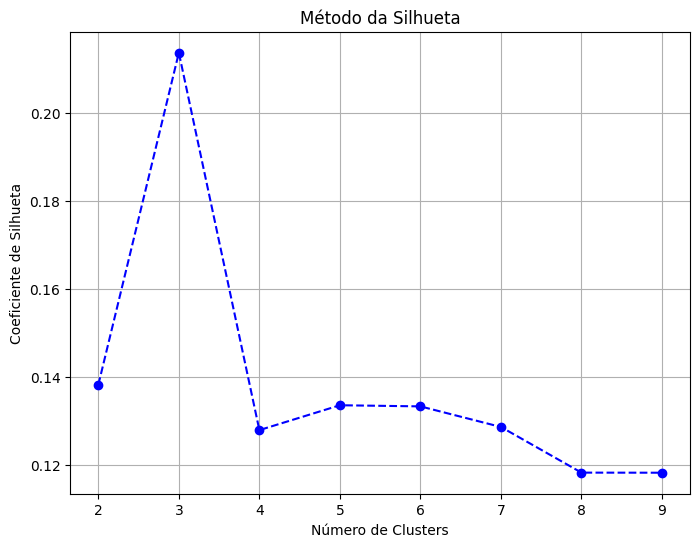

In [ ]:
# Calcular a pontuação da silhueta para diferentes números de clusters
silhouette_scores = []
i = 0
k_min = 2
k_max = 10

for n_clusters in range(k_min, k_max):
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    cluster_labels = kmeans.fit_predict(df_reduced)
    # gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
    # gmm.fit(df_reduced)
    # cluster_labels = gmm.predict(df_reduced)

    # spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=15, random_state=42)
    # cluster_labels = spectral_clustering.fit_predict(df_reduced)
    silhouette_avg = silhouette_score(df_reduced, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f'Iteração número: {i} - Coeficiente de Silhueta: {silhouette_avg} - Tempo gasto na iteração: {elapsed_time} segundos')
    i += 1

# Plotar o gráfico do método da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(k_min, k_max), silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta')
plt.xticks(range(k_min, k_max))
plt.grid(True)
plt.show()

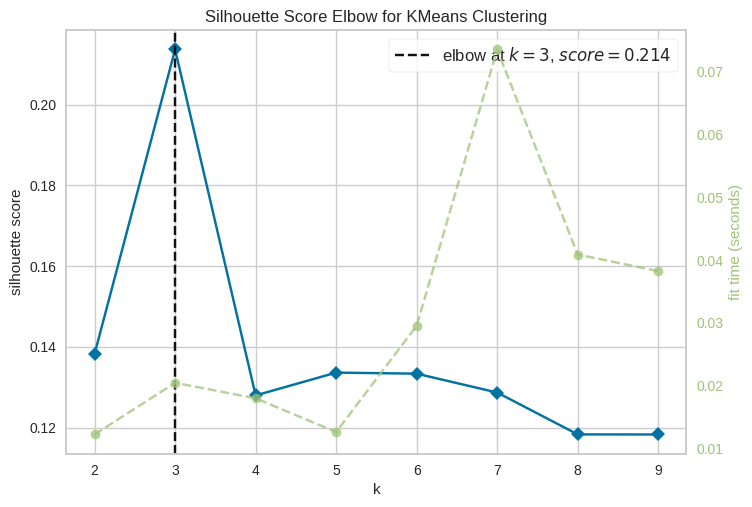

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0, n_init='auto')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True);
visualizer.fit(df_reduced)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

### 4.1.1.2 Método do Cotovelo para escolha do número de Clusters

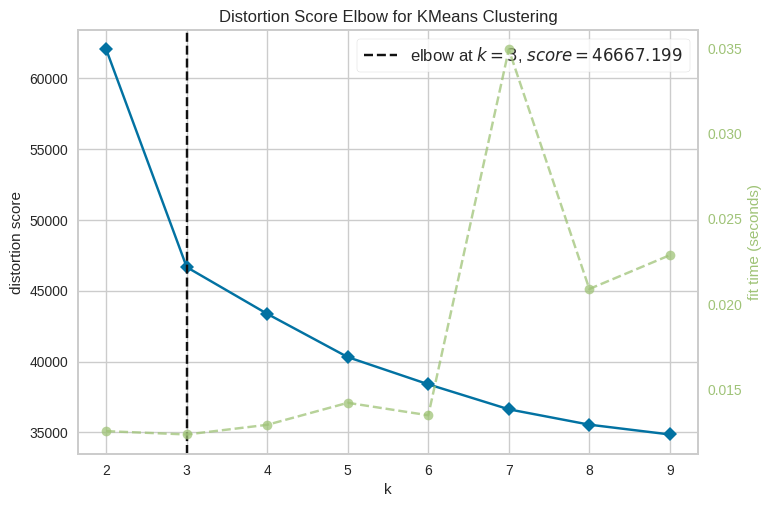

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0, n_init='auto')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True);
visualizer.fit(df_reduced)        # Fit data to visualizer
visualizer.show();        # Finalize and render figure

### 4.1.2 Treinar modelo de Clusterização

#### 4.1.2.1 K-Means

In [ ]:
# Treinar o algoritmo K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(df_reduced)

# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

df_publico['Cluster'] = labels


#### 4.1.2.2 Modelo de Mistura Gaussiana

##### 4.1.2.2.1 Seleção da quantidade de componentes

In [ ]:
from sklearn.mixture import GaussianMixture

n_components = range(1, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']
best_bic = float('inf')  # Inicialize com um valor infinito
best_config = None
bic_scores = []

for cov in covariance_type:
    for n_comp in n_components:
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cov, random_state=0)
        gmm.fit(df_reduced)
        bic_score = gmm.bic(df_reduced)
        bic_scores.append((cov, n_comp, bic_score))

        if bic_score < best_bic:
            best_bic = bic_score
            best_config = (cov, n_comp)

print("Melhor configuração:", best_config)
print("Menor BIC:", best_bic)

Melhor configuração: ('full', 8)
Menor BIC: 126536.37235070959


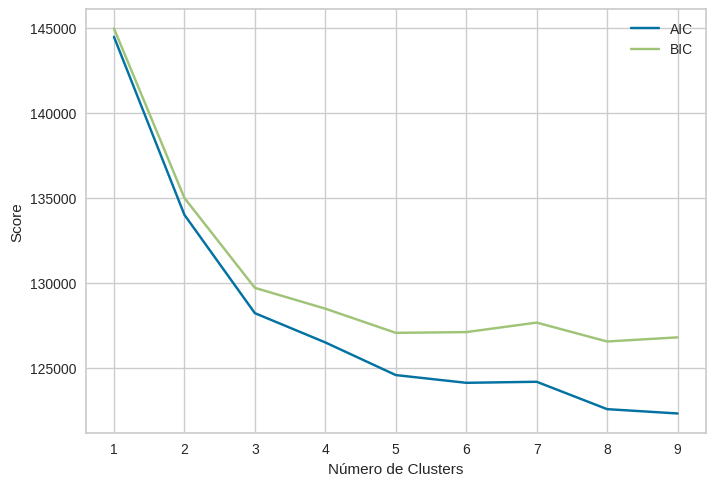

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Lista para armazenar valores de AIC e BIC
aic_scores = []
bic_scores = []

# Testar diferentes números de clusters
for n_clusters in range(1, 10):
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
    gmm.fit(df_reduced)
    aic_scores.append(gmm.aic(df_reduced))
    bic_scores.append(gmm.bic(df_reduced))

# Plotar AIC e BIC em função do número de clusters
import matplotlib.pyplot as plt

plt.plot(range(1, 10), aic_scores, label='AIC')
plt.plot(range(1, 10), bic_scores, label='BIC')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

##### 4.1.2.2.2 Treino do Modelo

In [ ]:
from sklearn.mixture import GaussianMixture
# Inicializar o modelo de Mistura Gaussiana
gmm = GaussianMixture(n_components=8, covariance_type='full', random_state=0)

# Ajustar o modelo aos dados com parâmetros de inicialização específicos
gmm.fit(df_reduced)

# Prever os rótulos dos clusters
labels = gmm.predict(df_reduced)

df_publico['Cluster'] = labels


### 4.1.3 Análise dos Clusters Gerados

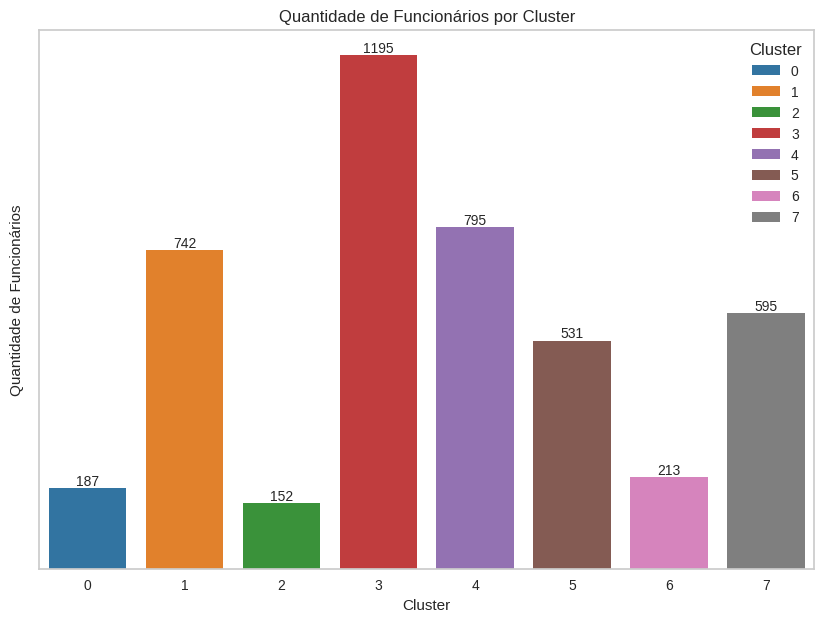

In [ ]:
pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
pal = pal[:len(np.unique(labels))]

plt.figure(figsize=(10,7))
pl = sns.countplot(data=df_publico, x="Cluster",hue="Cluster",palette=pal)

for i in range(len(pl.containers)):
  pl.bar_label(pl.containers[i], fontsize=10)
pl.set_title("Quantidade de Funcionários por Cluster")
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylabel('Quantidade de Funcionários')
plt.grid(False)
plt.show()

Nota-se que:
  * 27% dos funcionários estão concentrados no cluster 3;
  * O segundo cluster com maior participação é o 4 representando 18% do total;
  * O cluster 2 teve a menor participação correspondendo a aproximadamente 3,5% do total.

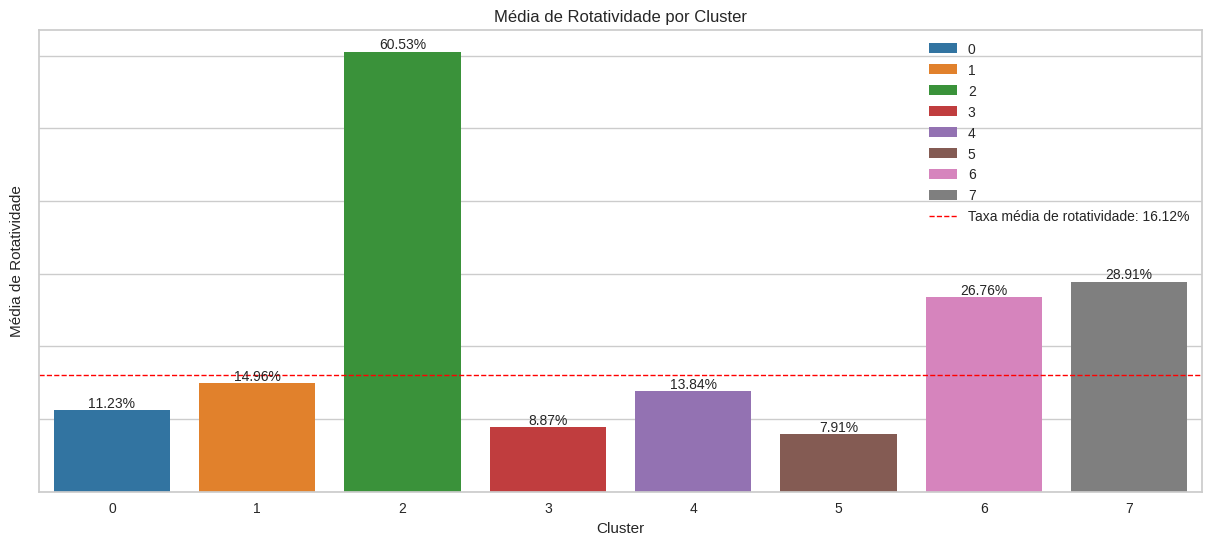

In [ ]:
df_publico['TARGET'] = (df_publico['Rotatividade'] == 'Sim').astype(int)

# Calcular a média da variável "Rotatividade" para cada cluster
mean_rotatividade_by_cluster = df_publico.groupby("Cluster")["TARGET"].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(15, 6))
sns.barplot(x="Cluster", y="TARGET", data=mean_rotatividade_by_cluster, palette=pal, hue="Cluster")
plt.axhline(taxa_media_rotatividade, color='red', linestyle='dashed', linewidth=1, label='Taxa média de rotatividade: {:.2f}%'.format(taxa_media_rotatividade * 100))

plt.title("Média de Rotatividade por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Média de Rotatividade")



# Adicionando os valores das taxas de rotatividade nas barras
for i, taxa in enumerate(mean_rotatividade_by_cluster.TARGET.values):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

plt.gca().axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

Verifica-se que:
 * Os clusters 2, 6 e 7 são os que apresentam maior taxa de rotatividade com 60,5%, 26,8% e 28,9% respectivamente;
 * Todos os demais clusters apresentam menor rotatividade em percentual do que a média da empresa;
 * O Cluster 5 possui o menor percentual de rotatividade dentre todos os demais clusters.

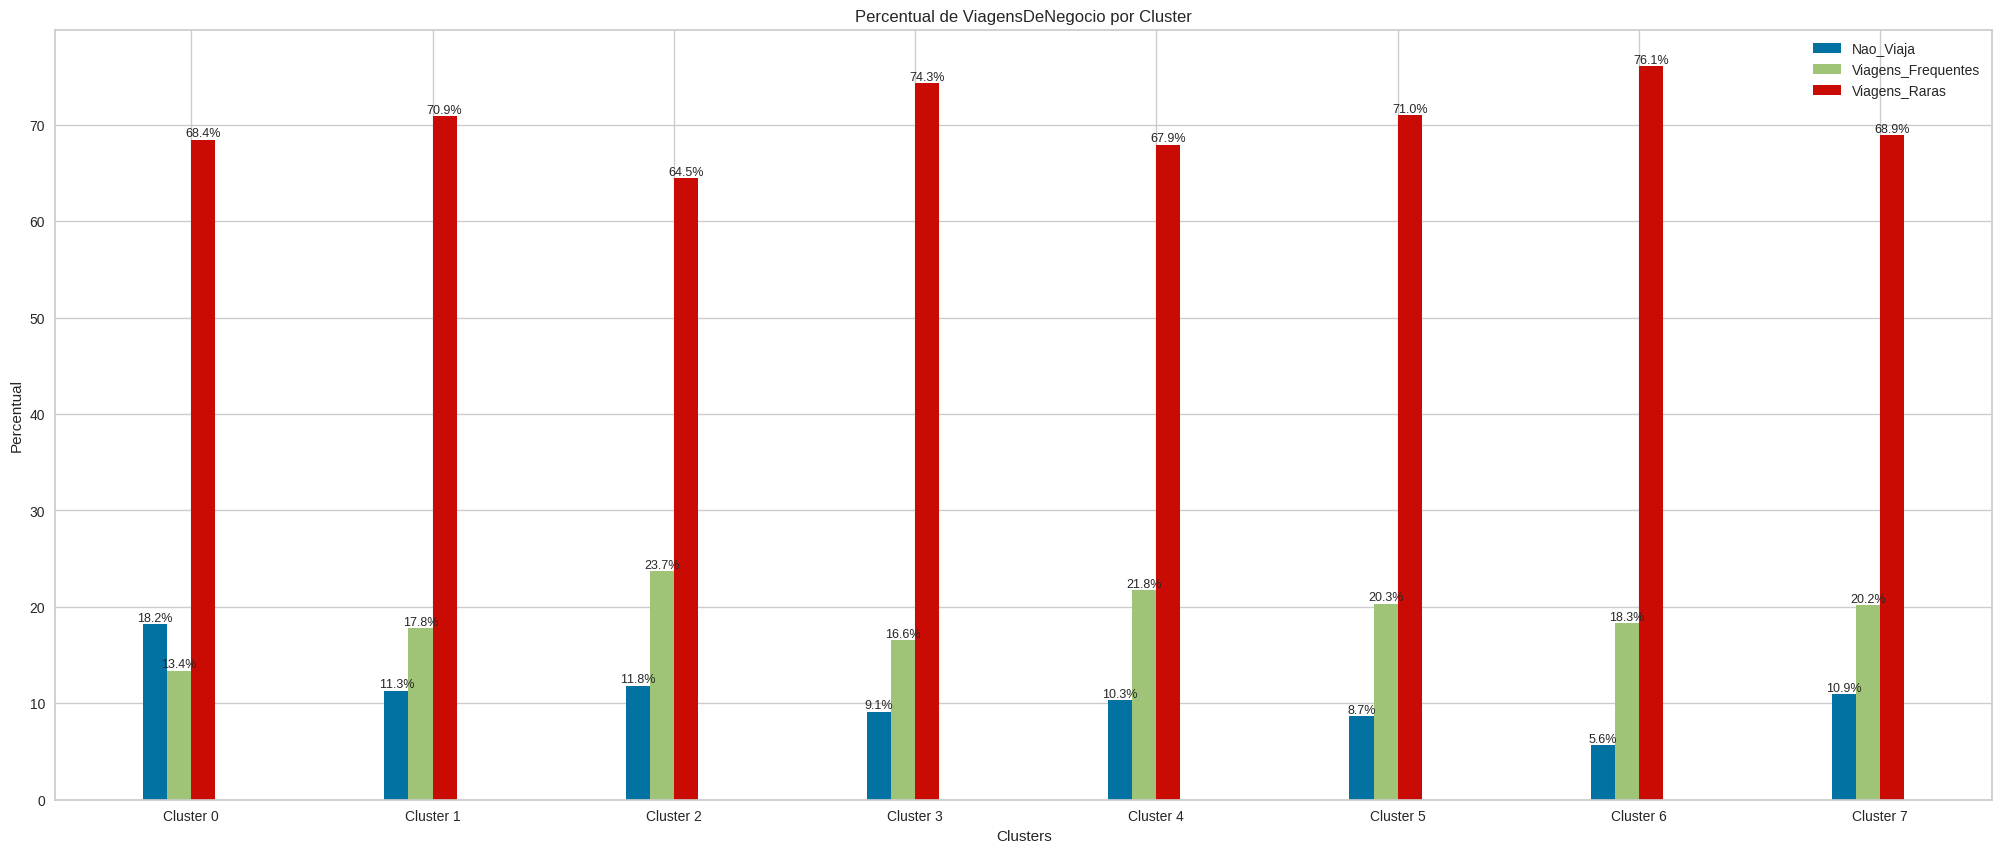

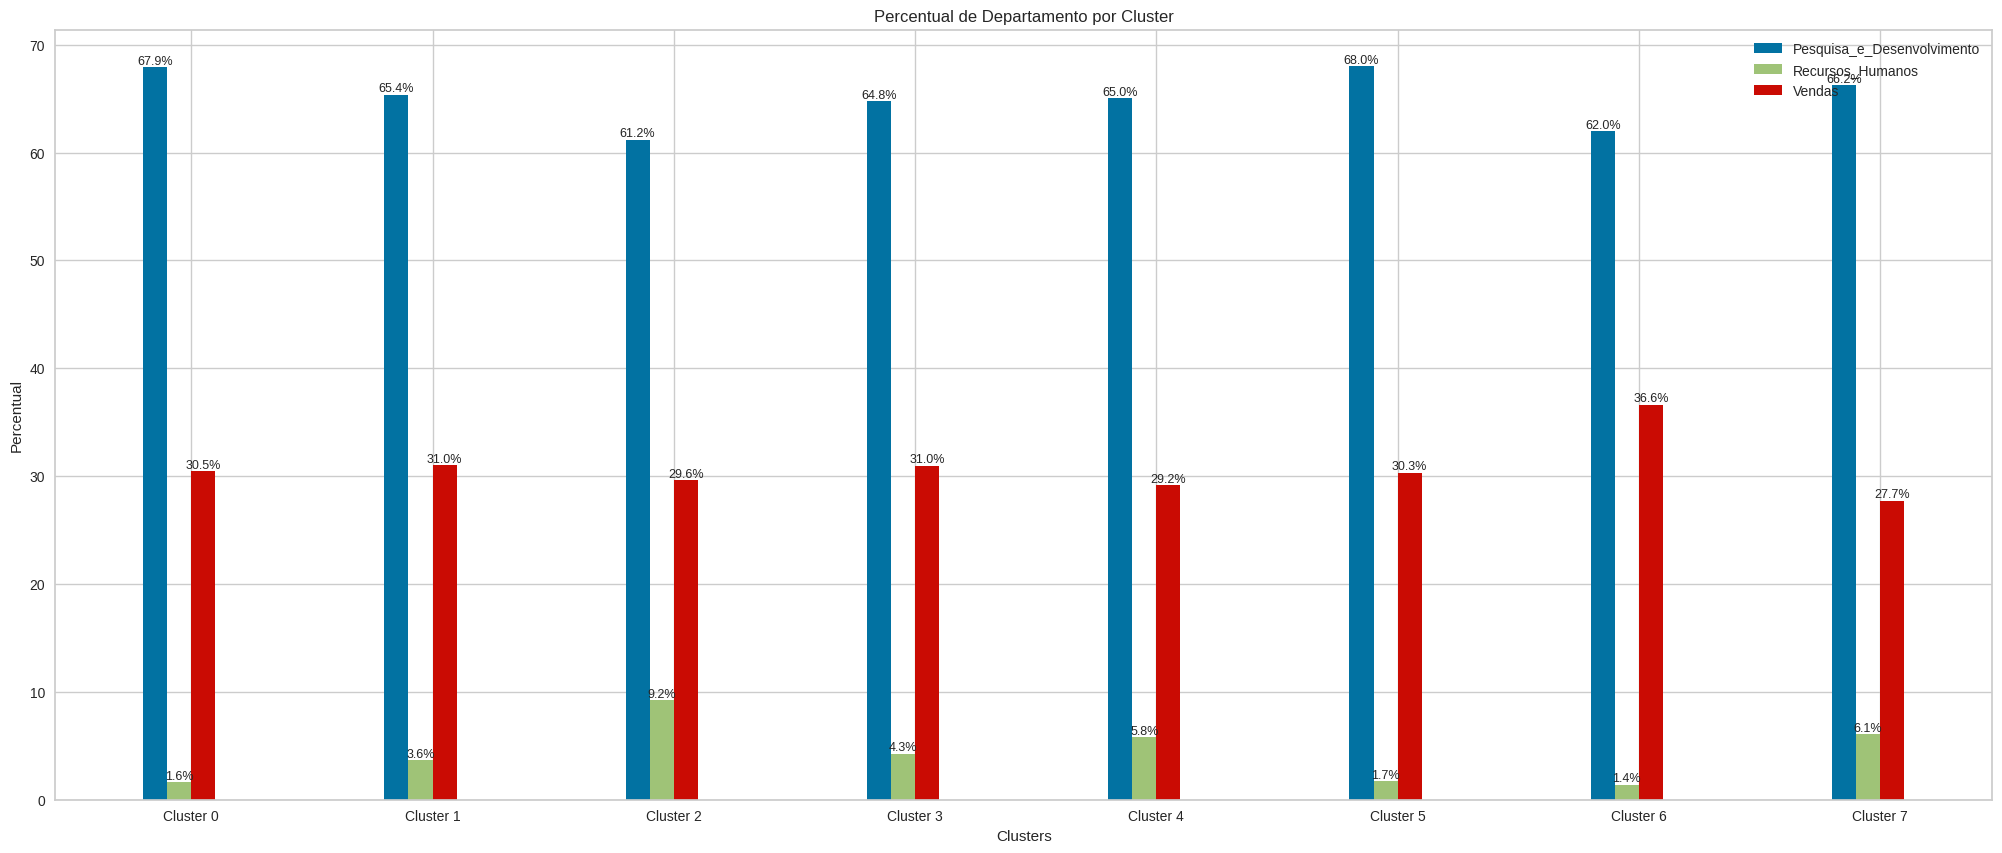

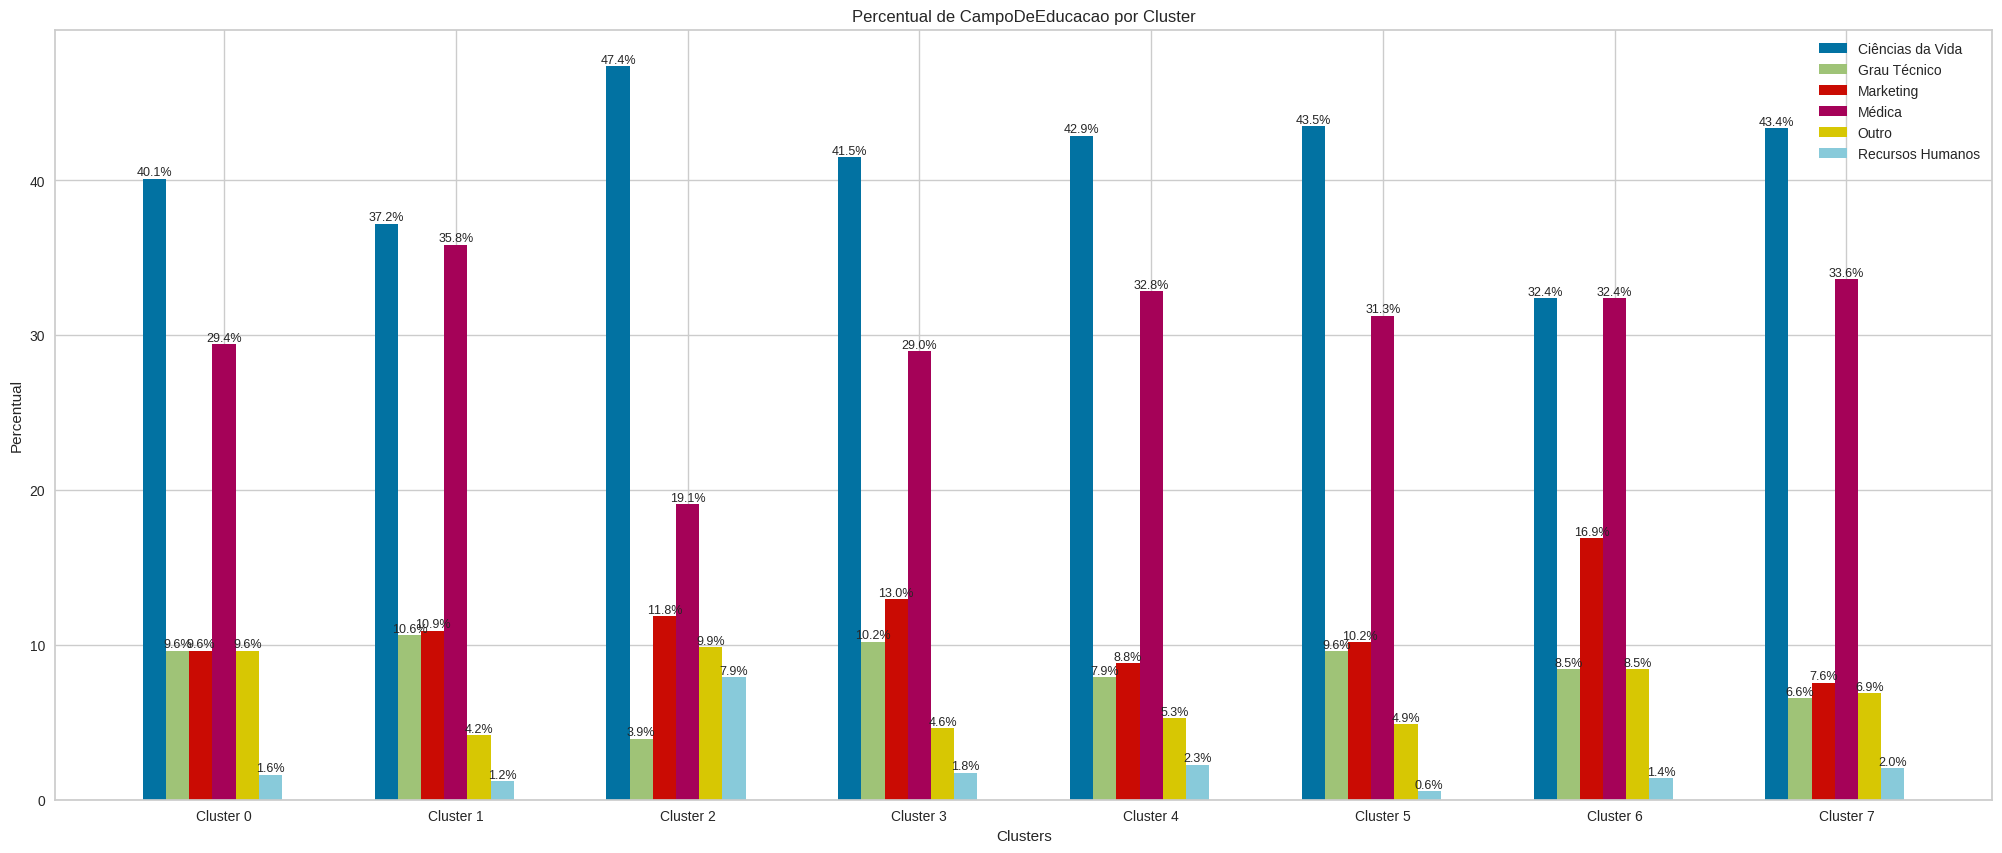

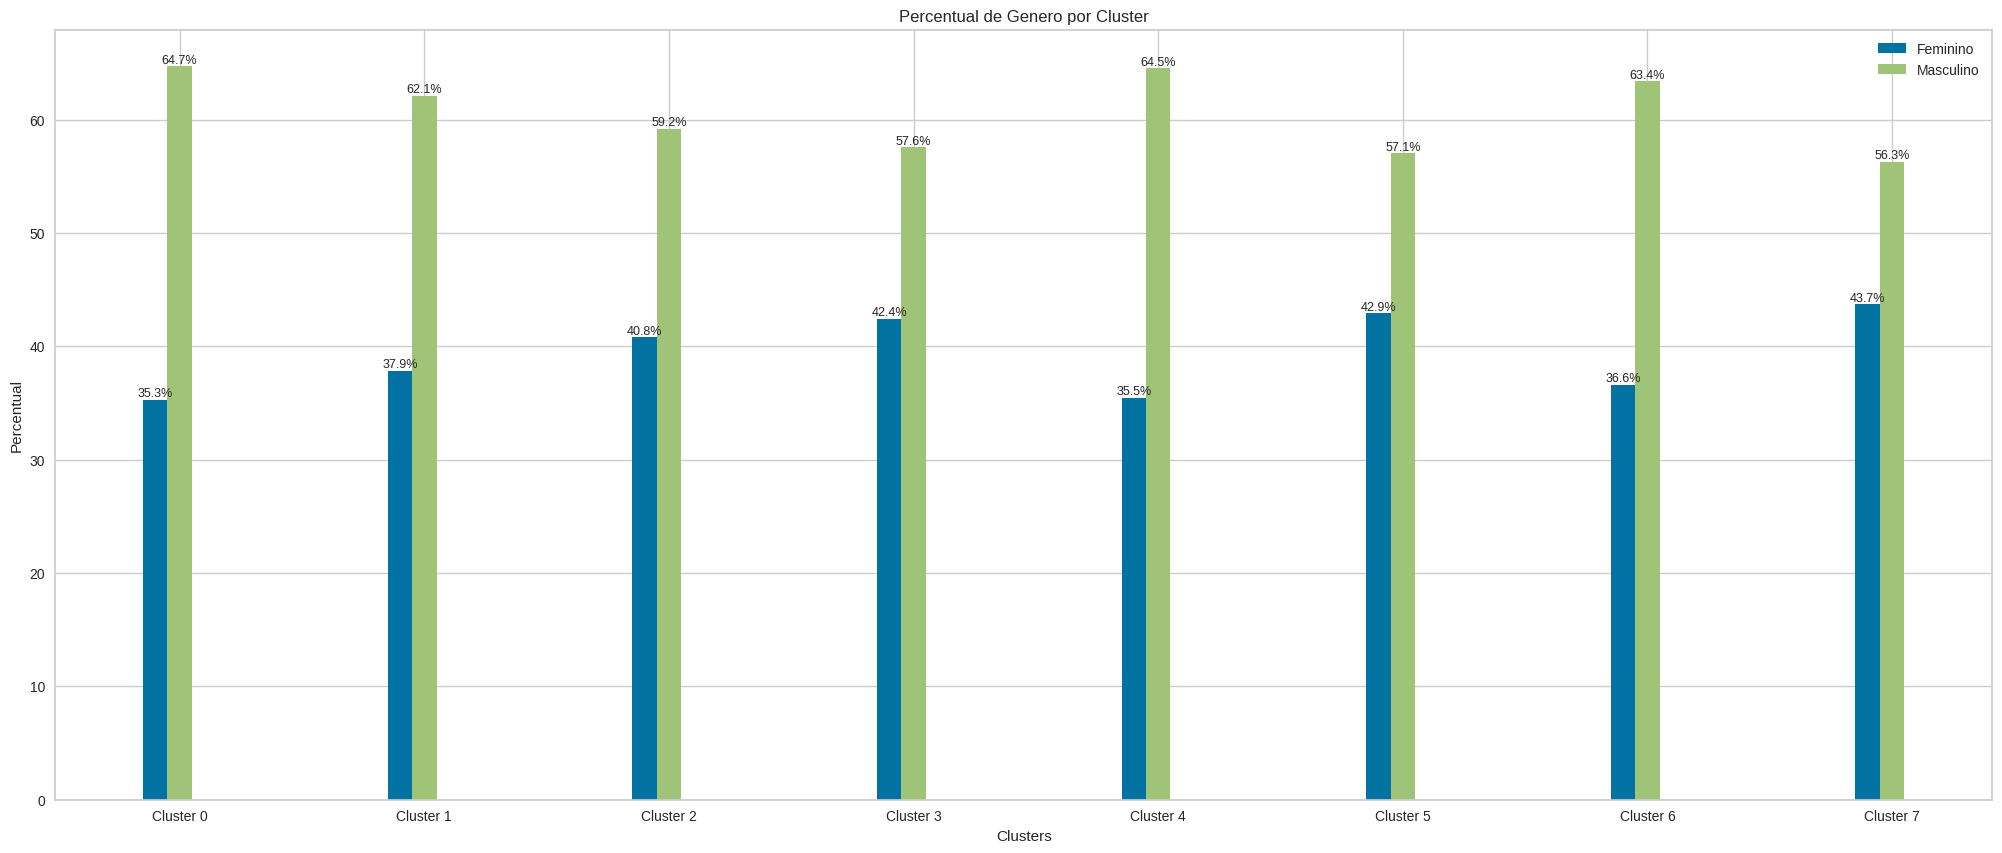

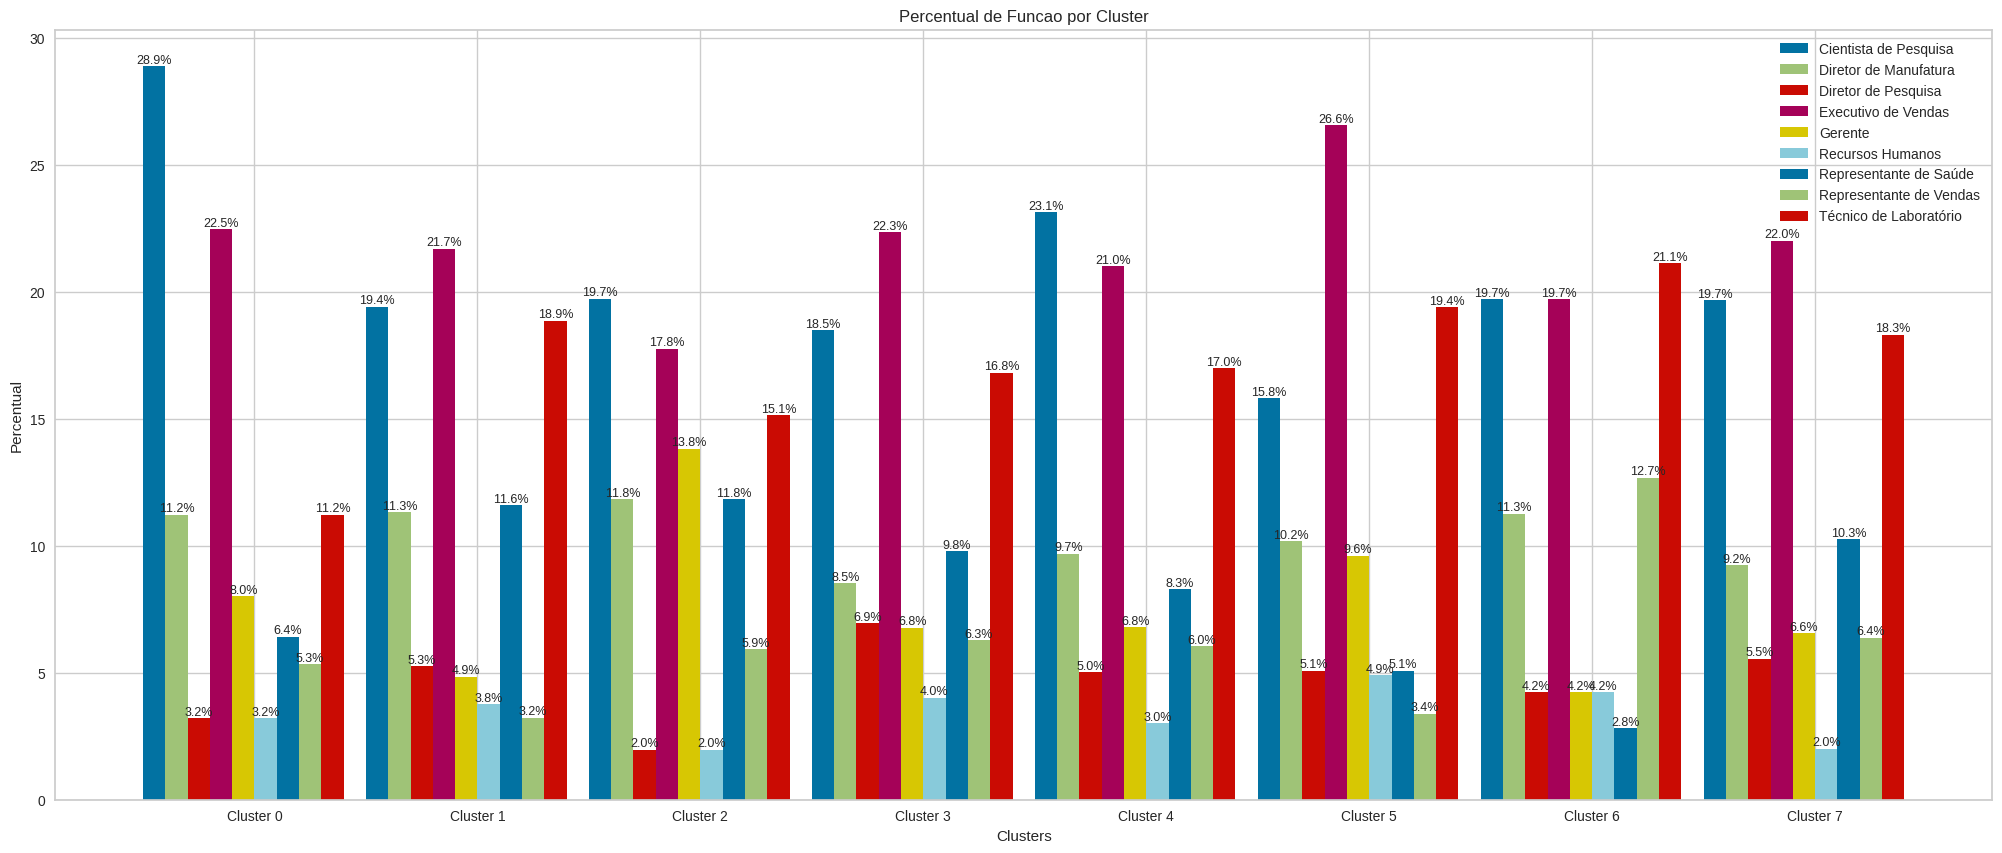

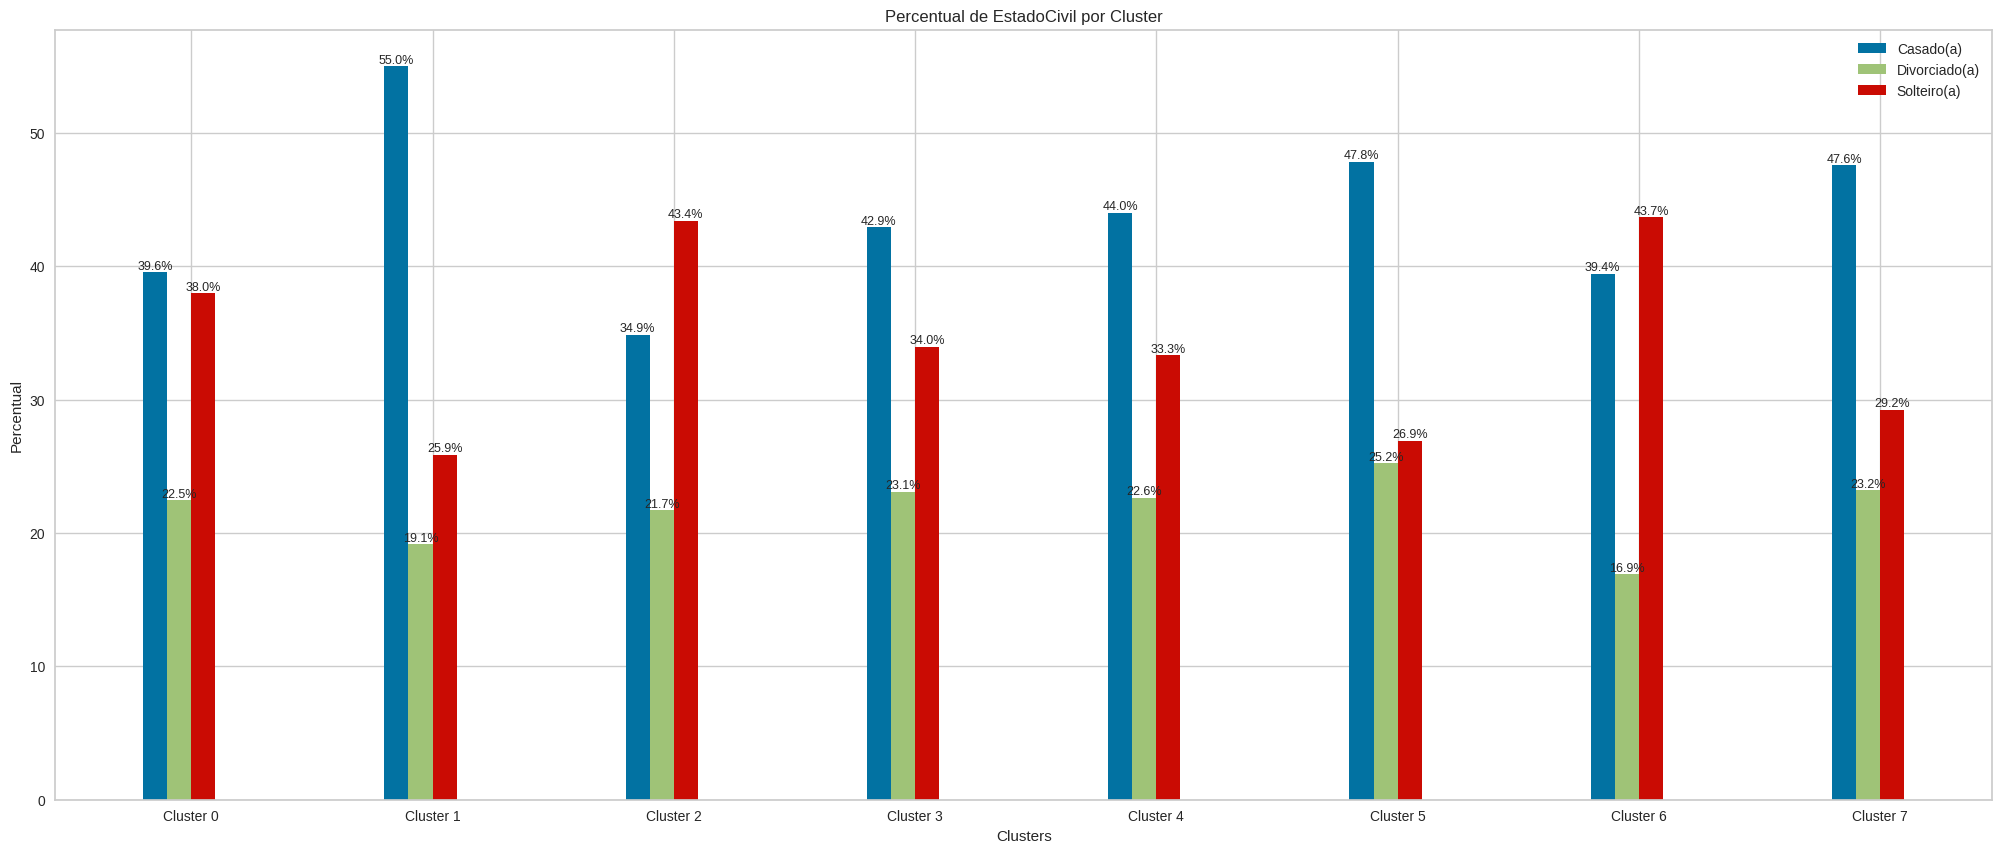

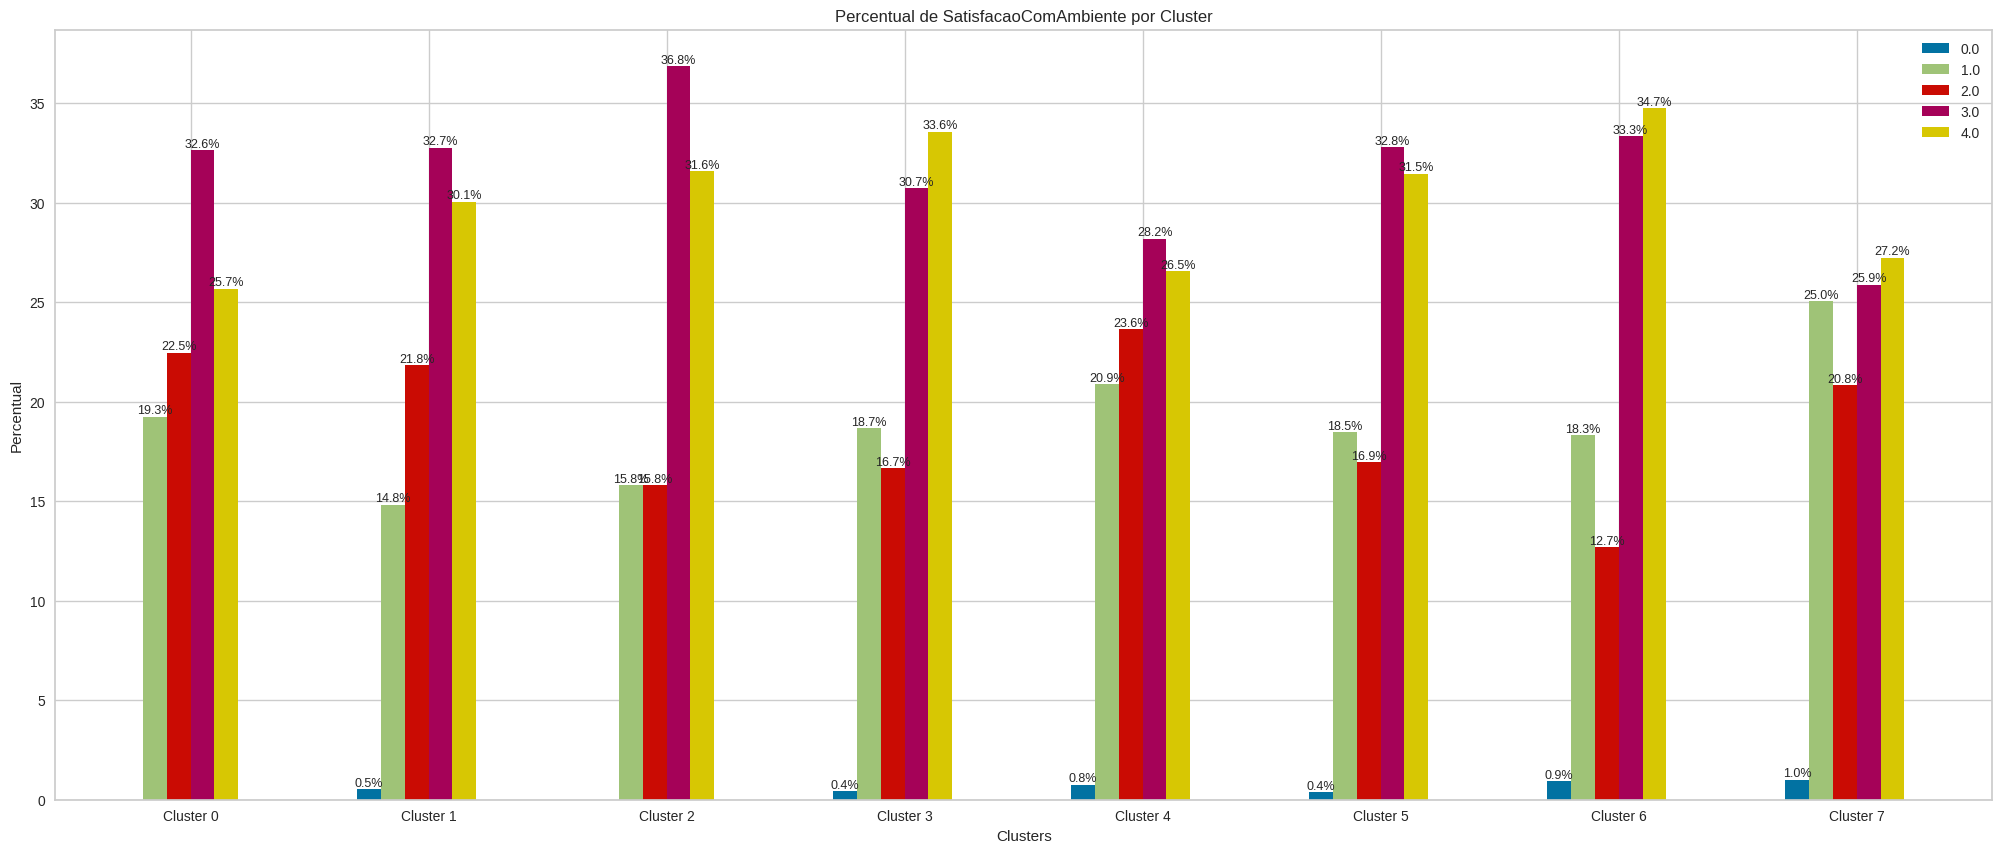

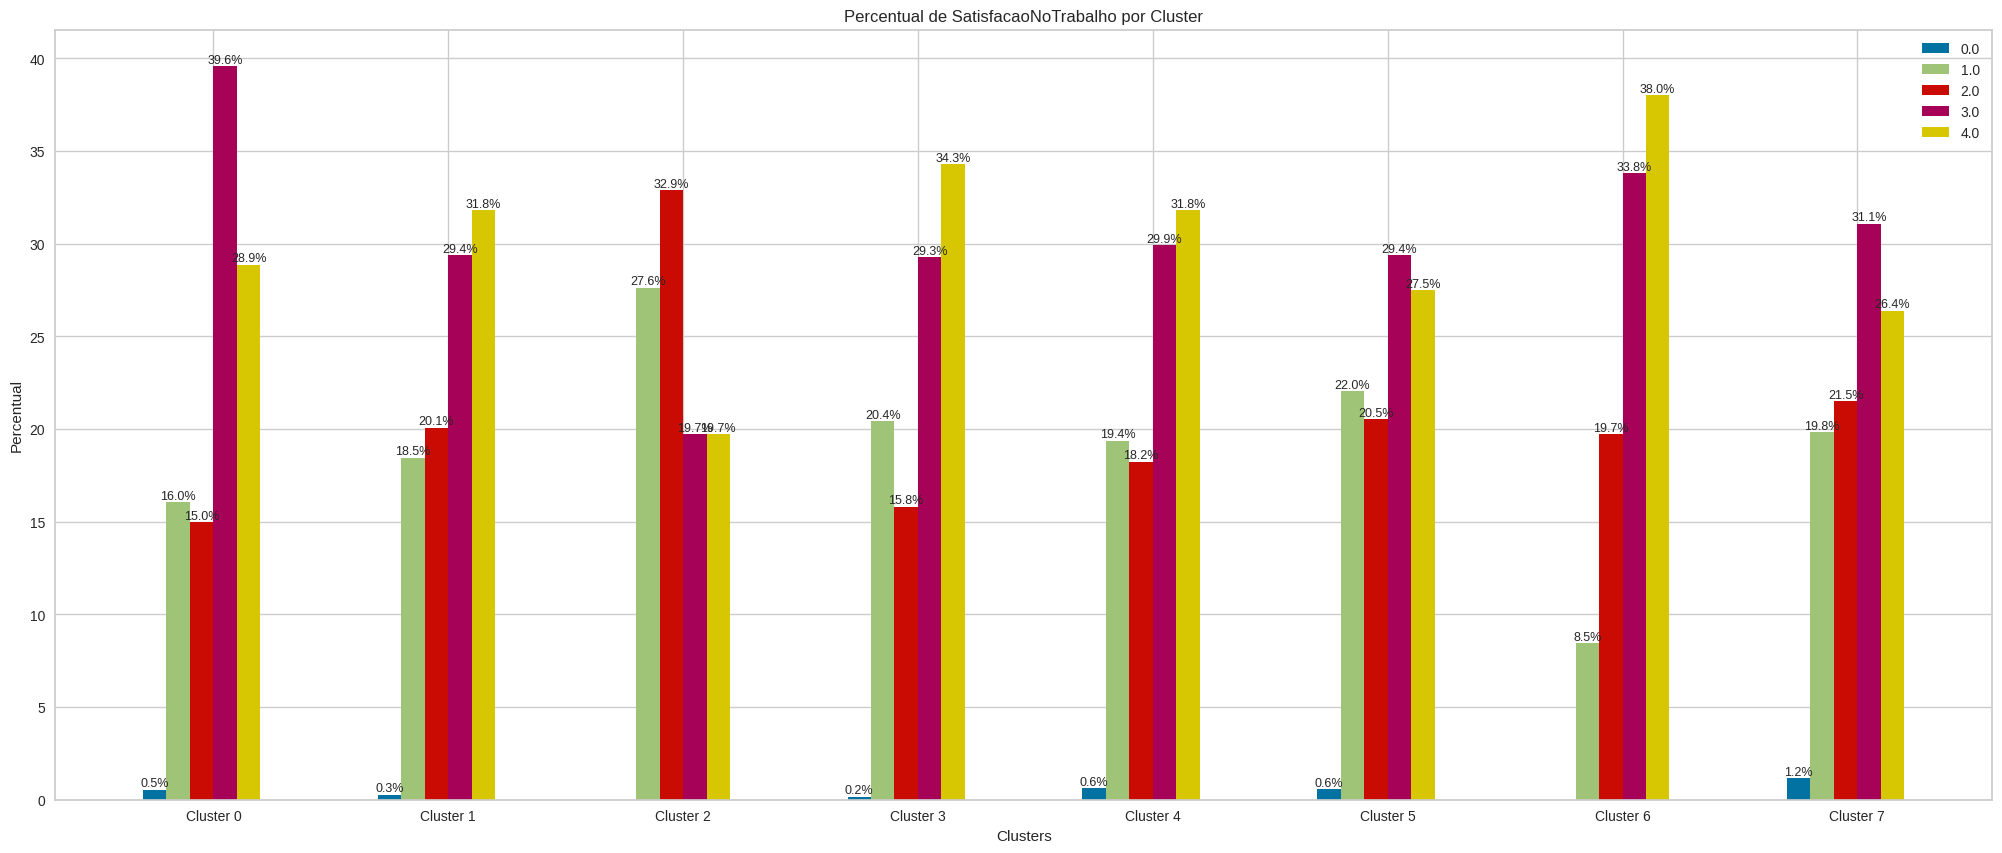

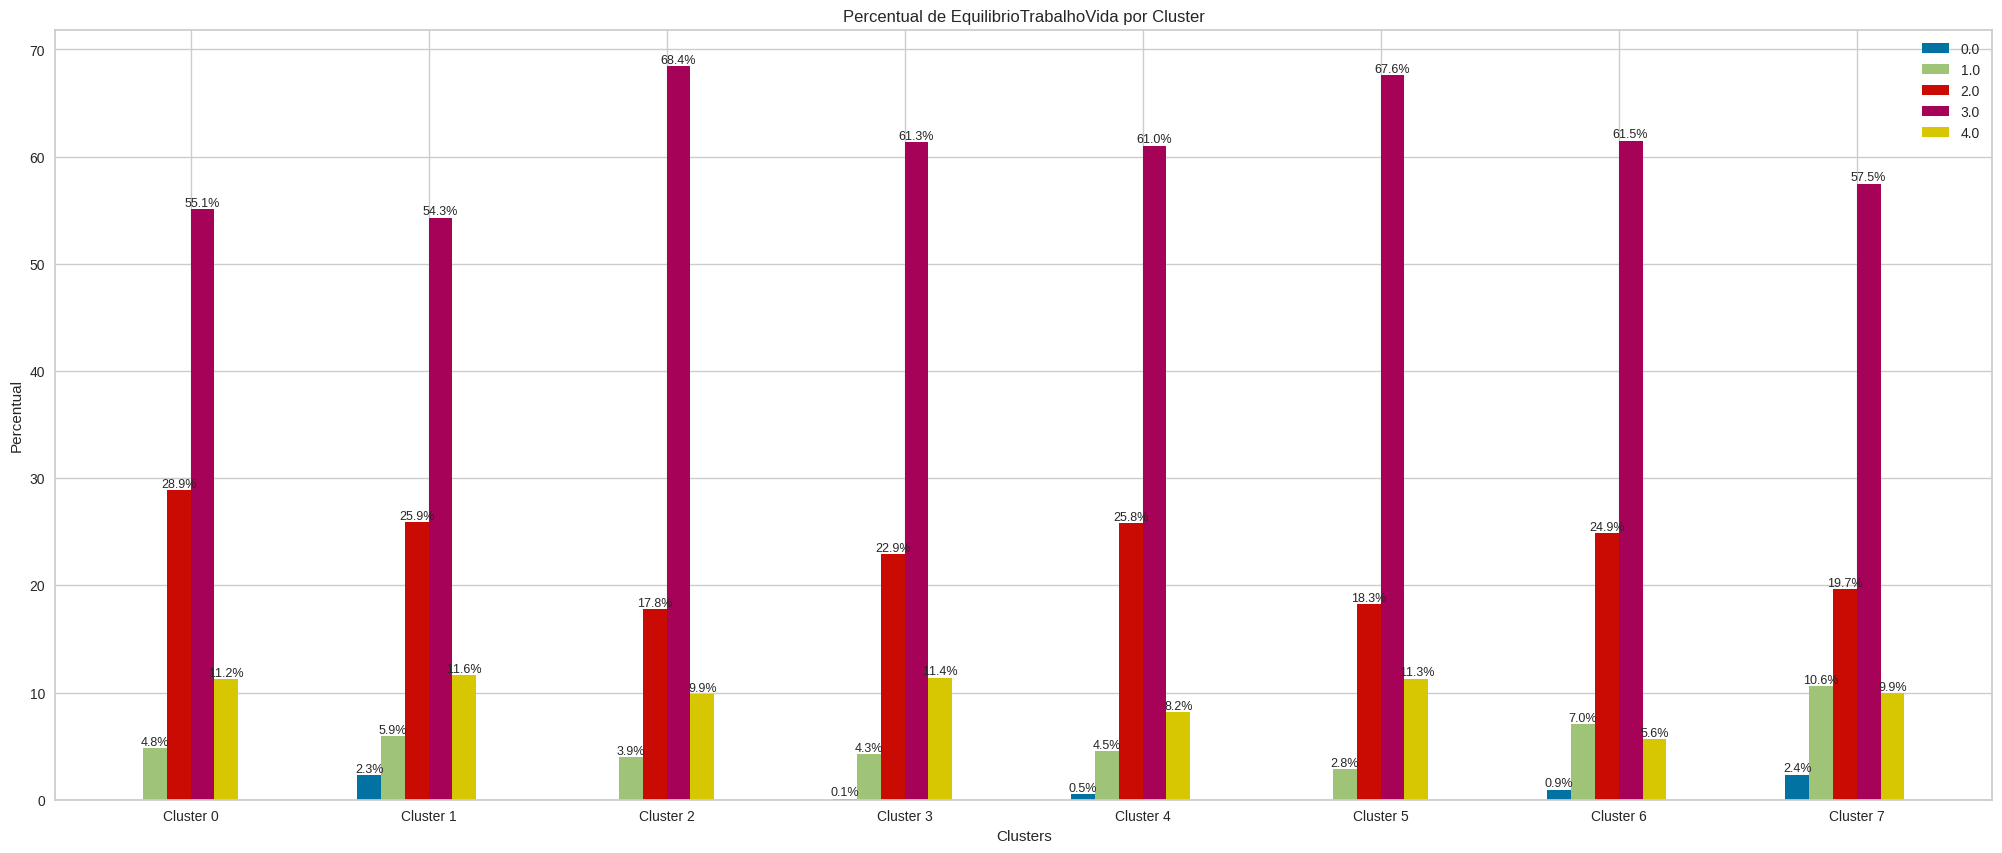

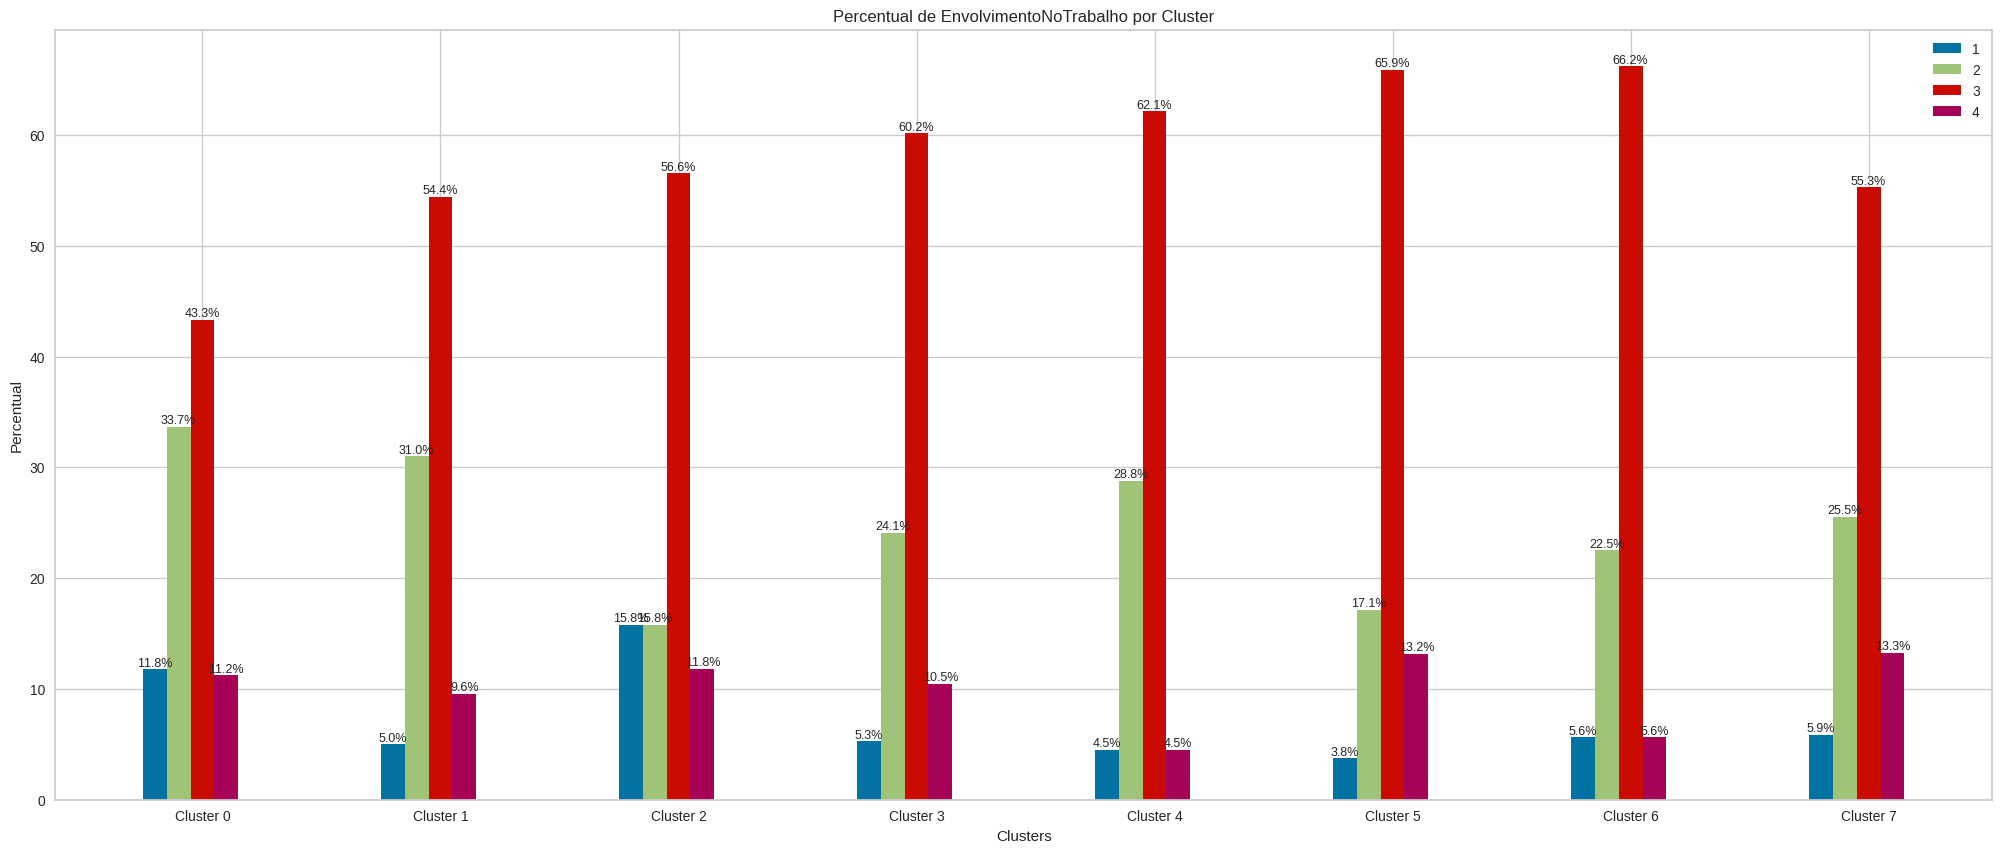

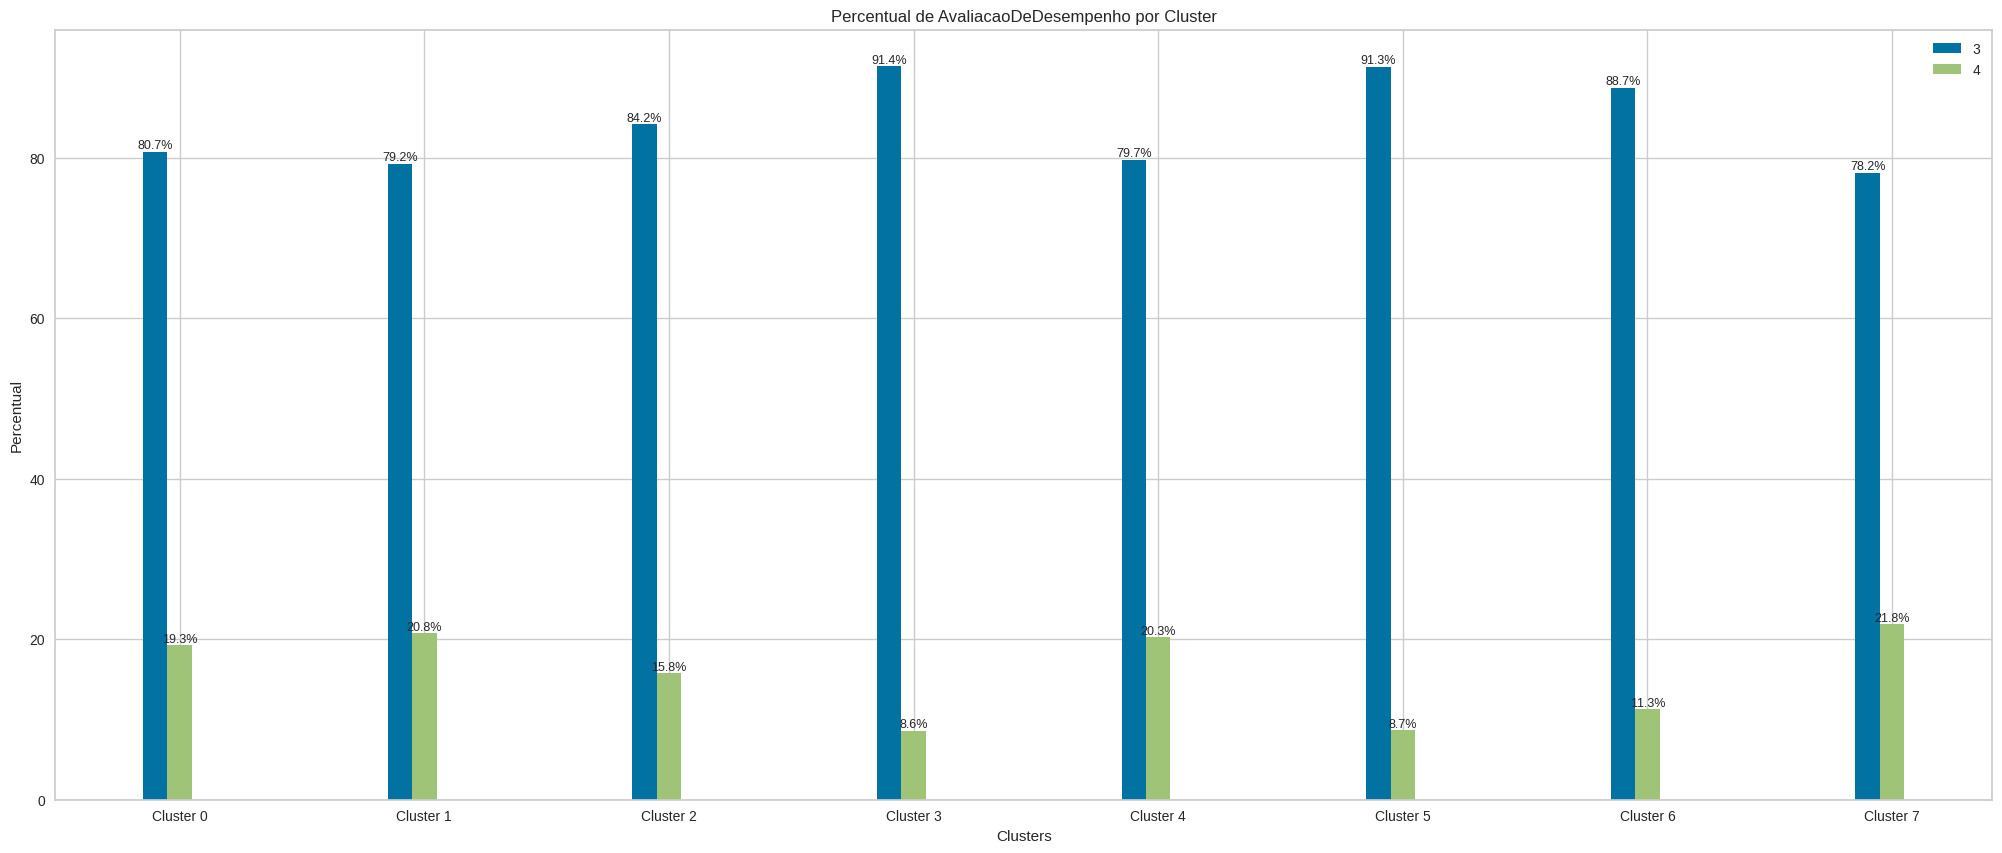

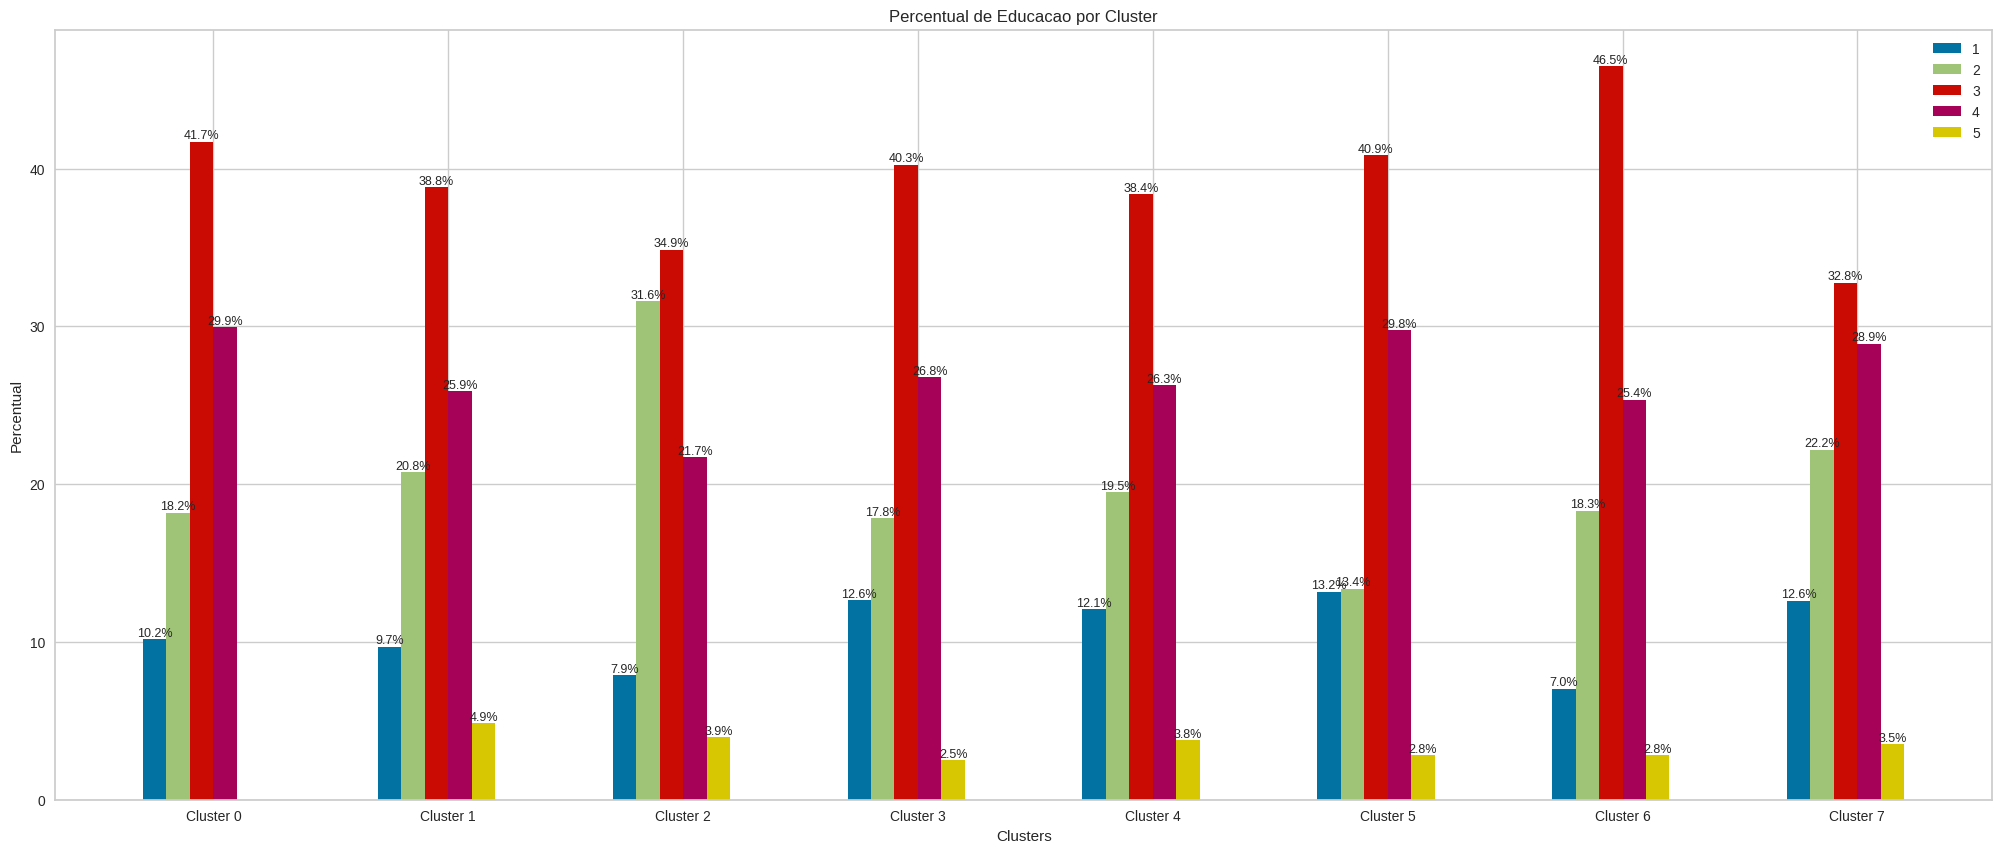

In [ ]:
# Variáveis a serem analisadas

vars1 = list(cat_attributes.columns).copy()
vars1.remove('MaiorDe18')
vars1.remove('Rotatividade')

vars2 = ['SatisfacaoComAmbiente','SatisfacaoNoTrabalho','EquilibrioTrabalhoVida','EnvolvimentoNoTrabalho','AvaliacaoDeDesempenho','Educacao']

vars_categoricas = vars1 + vars2

for var in vars_categoricas:
  percentuais_por_cluster = df_publico.groupby('Cluster')[var].value_counts(normalize=True).mul(100).unstack().reset_index().values

  # Extrair os clusters e os percentuais de satisfação
  clusters = percentuais_por_cluster[:, 0]
  percentuais = percentuais_por_cluster[:, 1:]

  # Largura da barra
  bar_width = 0.1

  # Coordenadas das barras
  x = np.arange(len(clusters))

  # Plotar o gráfico de barras
  plt.figure(figsize=(25, 10))

  unicos = sorted(df_publico[var].unique())
  for i in range(len(percentuais[0])):
      j = unicos[i]
      plt.bar(x + i * bar_width, percentuais[:, i], bar_width, label=f'{j}')
      for j, val in enumerate(percentuais[:, i]):
          plt.text(x[j] + i * bar_width, val, '{:.1f}%'.format(val), ha='center', va='bottom', fontsize=9)

  # Adicionar rótulos e título
  plt.xlabel('Clusters')
  plt.ylabel('Percentual')
  plt.title(f'Percentual de {var} por Cluster')
  plt.xticks(x + bar_width * len(percentuais[0]) / 2, [f'Cluster {int(cluster)}' for cluster in clusters])
  plt.legend(loc='best')

  # Mostrar o gráfico
  plt.show()


Insights gerados:
* Viagens de Negócio:
  * Não houve diferença significativa entre a distribuição de Viagens de Negócio entre os Clusters
* Departamento:
  * Não houve diferença significativa entre a distribuição de departamento entre os clusters.
* Campo de Educação:
  * Todos os clusters apresentam os Ciência da Vida e Médica como os mais representativos.
* Gênero:
  * O cluster com maior taxa de rotatividade (Cluster 2) apresenta uma pequena discrepância na distribuição em relação ao percentual de gênero tendo 59,2% do genêro masculino e 40,8% feminino;
  * O cluster 7, o segundo maior em taxa de rotatividade, apresenta 56,3% do gênero masculino e 43,7% feminino;
  * Em todos os clusters houve maior percentual de funcionários do gênero masculino do que feminino.
* Função:
  * Todas as funções estão contidas em todos os clusters;
  * Os clusters 1, 3, 5 e 7 são os únicos em que que a função de Executivo de Vendas apresenta o maior percentual;
* Estado Civil:
  * O cluster 1 apresenta o maior percentual de funcionários que são casados;
  * O estado civil casado é o dominante em 71% dos clusters;
  * Os cluster 2 e 6 possuem um maior percentual de funcionários solteiros do que casados diferente dos demais Clusters;
  * O cluster 5 apresenta o maior percentual de divorciados.
* Satisfação com o Ambiente:
  * Nos clusters 0 e 2 são os únicos onde não possúimos o nível de satisfação 0;
  * O cluster 7 apresenta percentualmente a maior concentração de funcionários com nível de satisfação com o ambiente igual 1;
  * O cluster 4 apresenta percentualmente a maior concentração de funcionários com nível de satisfação com o ambiente igual 2;
* Satisfação com o Trabalho:
  * Os clusters 6 apresenta o maior percentual de nível satisfação com o trabalho igual a 3 dentre os demais clusters;
  * No cluster 6 71,8% dos funcionários apresentam nível de satisfação com o ambiente igual a 3 ou superior enquanto nos clusters 0 e 3 este valor corresponde a 68,5% e 63,6% respectivamente.
  * No cluster 2 onde possuímos a maior taxa de rotatividade, 60,5% dos funcionários apresenta o nível satisficação com o trabalho inferior a 2.
* Equilíbrio Trabalho x Vida:
  * O nível de equilíbrio predominante em todos os clusters é 3 tendo o maior e menor percentual respectivamente nos clusters 2 e 1;
  * Em todos os clusters há predominância dos níveis 3 e 2.
* Envolvimento no Trabalho:
  * Em todos os clusters o nível de envolvimento no trabalho predominante foi 3;
  * No cluster 5, 79,1% dos funcionários tiveram nível de envolvimento no trabalho maior ou igual a 3. Enquanto no cluster 3, este valor foi de 70,3%. No cluster 6, por sua vez, foi de 71,8%.
* Avaliação de Desempenho:
  * Todos os funcionários da empresa obtiveram nível 3 ou 4;
  * O cluster 3 e 5 se destacam por apresentarem a maior porcentagem de funcionários que obtiveram nível 3;
  * O cluster 7 se destacou por obter maior percentual de colaboradores com nível 4.
* Educação:
  * O cluster 6 apresenta maior concentração percentual de bacharéis;
  * Em todos os clusters o nível de bacharéu (nível 3) é o mais frequente;
  *  O cluster 3 apresenta a maior concentração percentual de funcionários com nível abaixo do superior (nível 1);
  * Não possuímos doutores no Cluster 0.

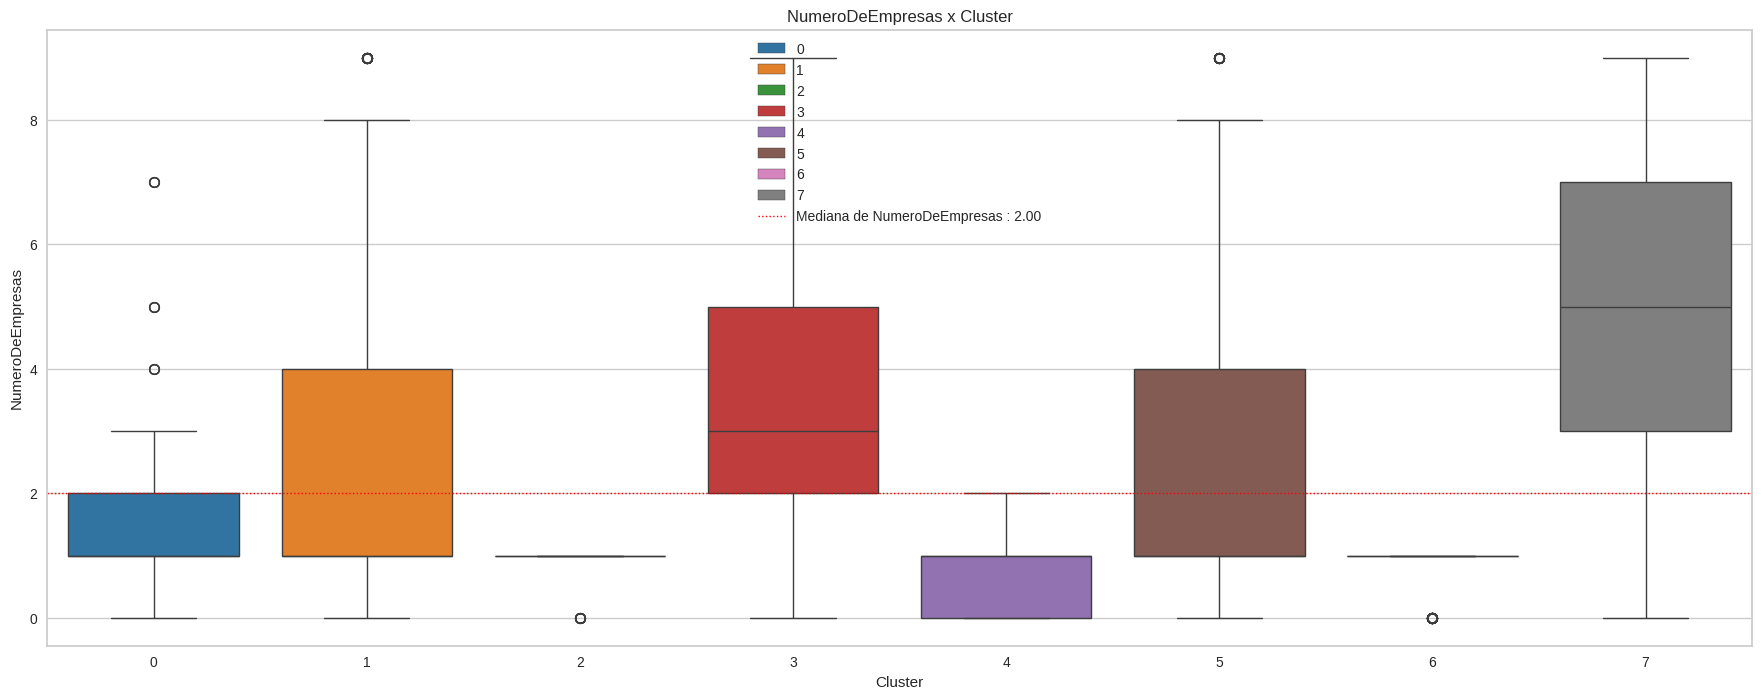

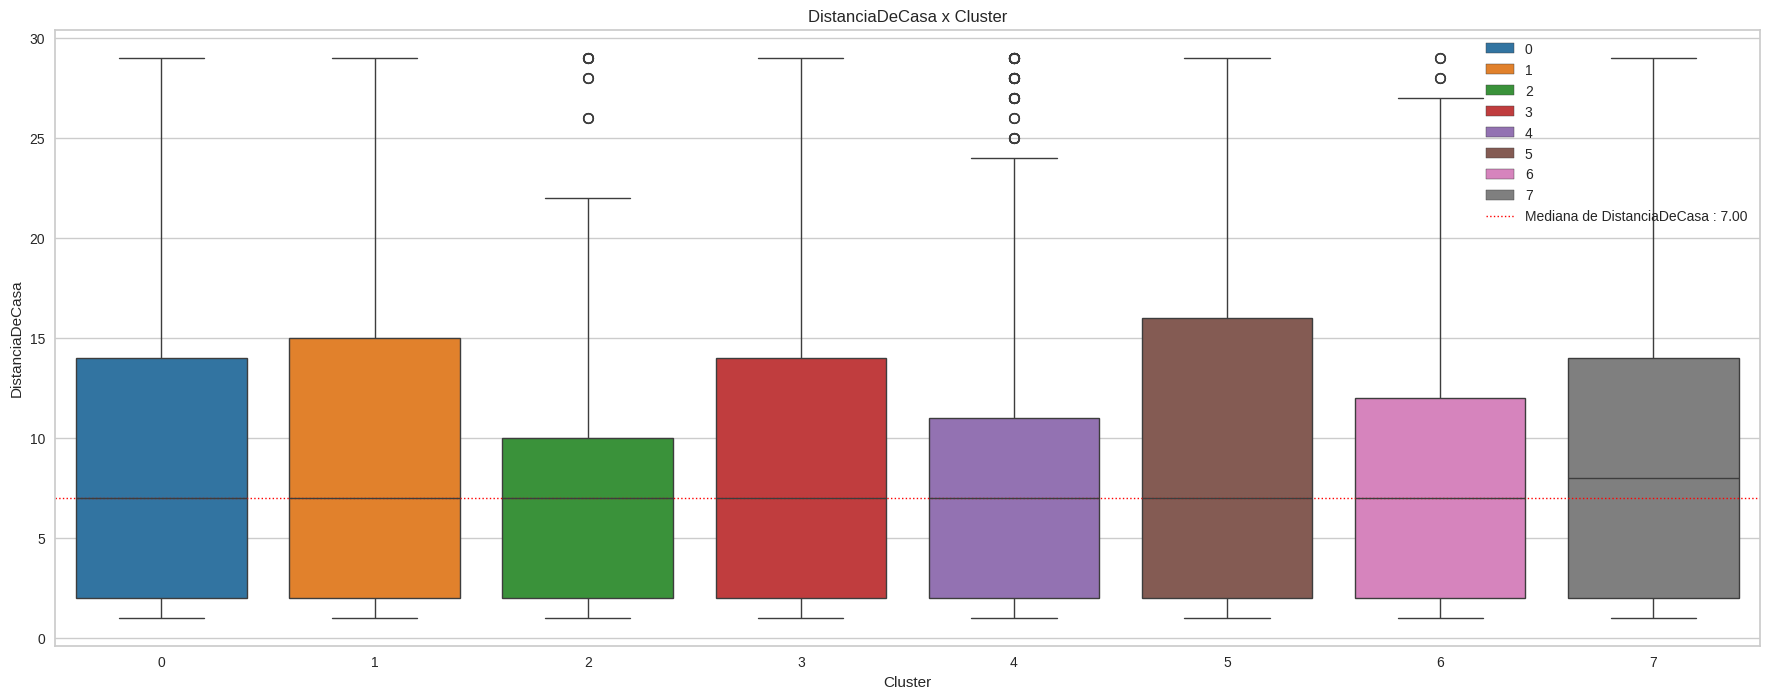

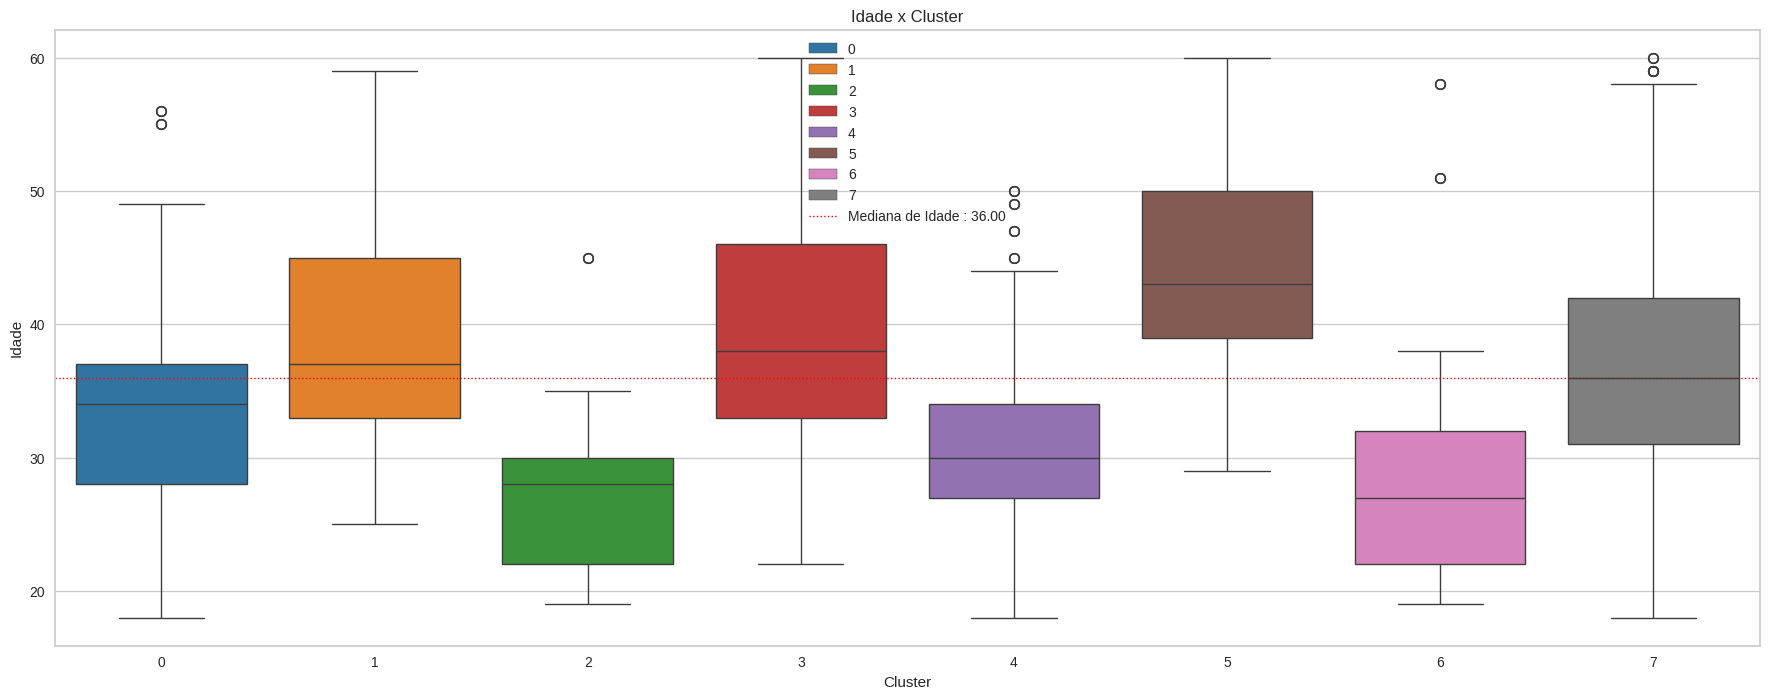

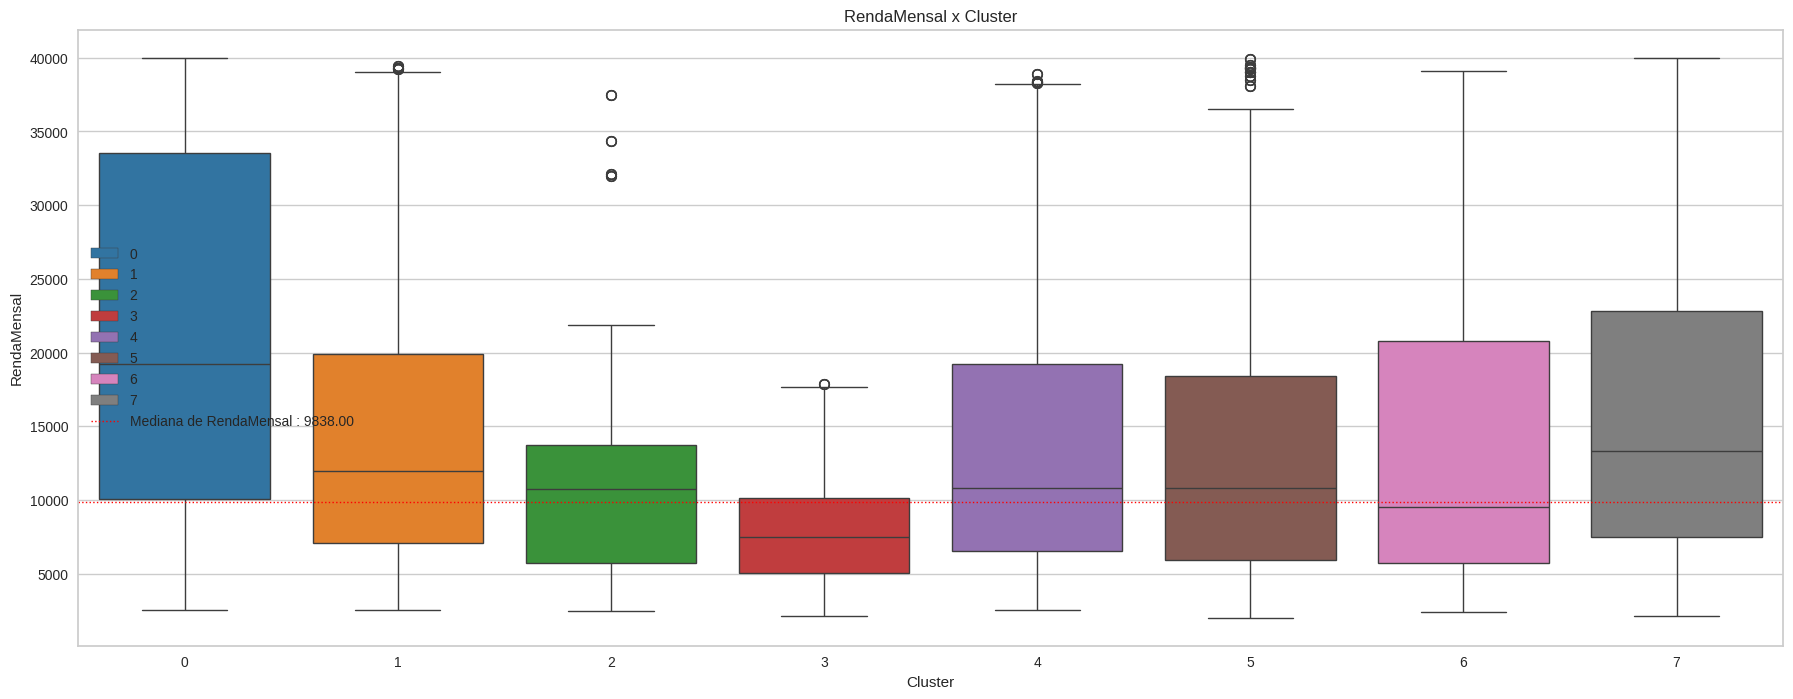

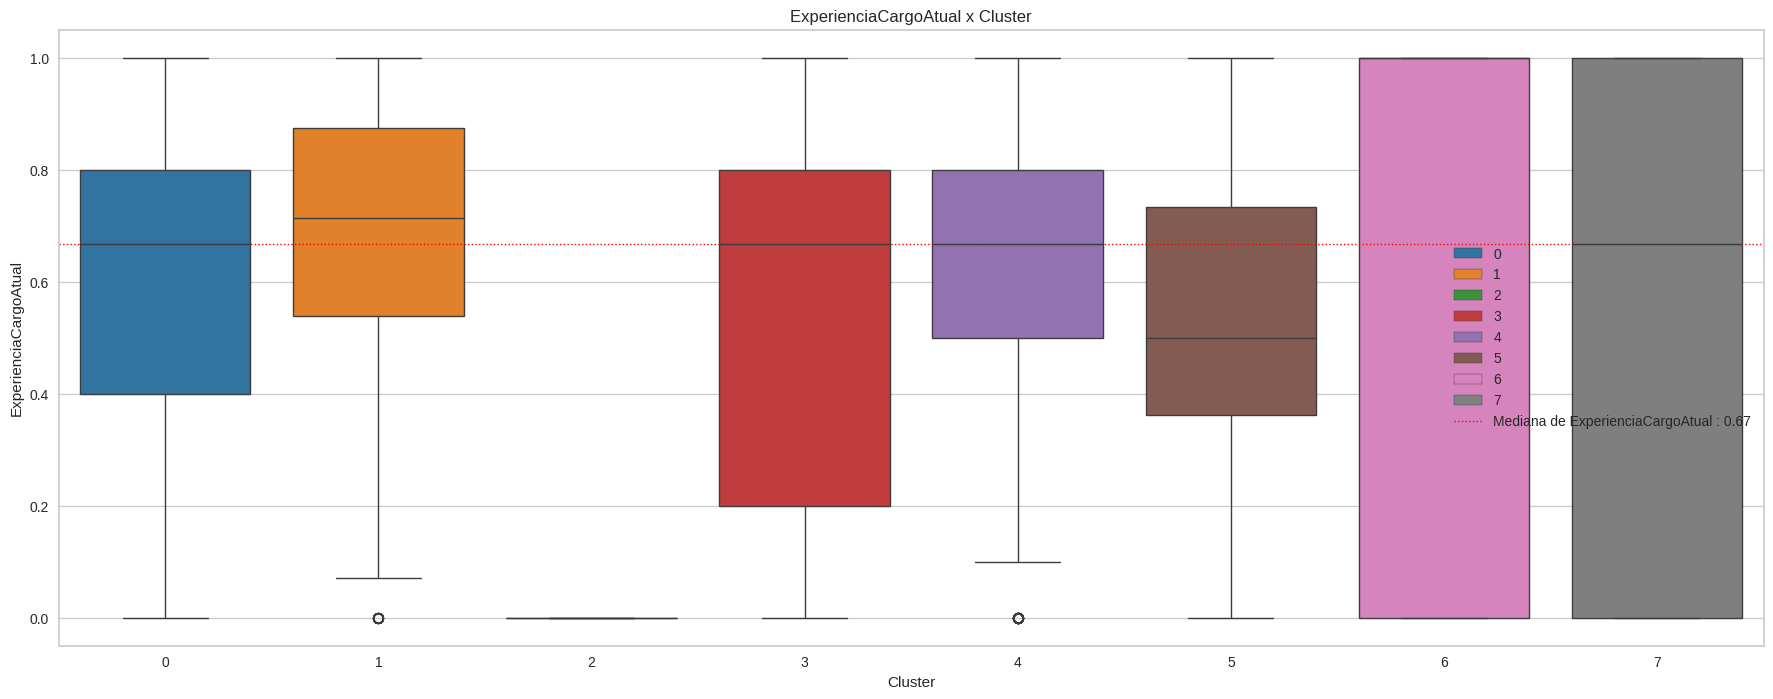

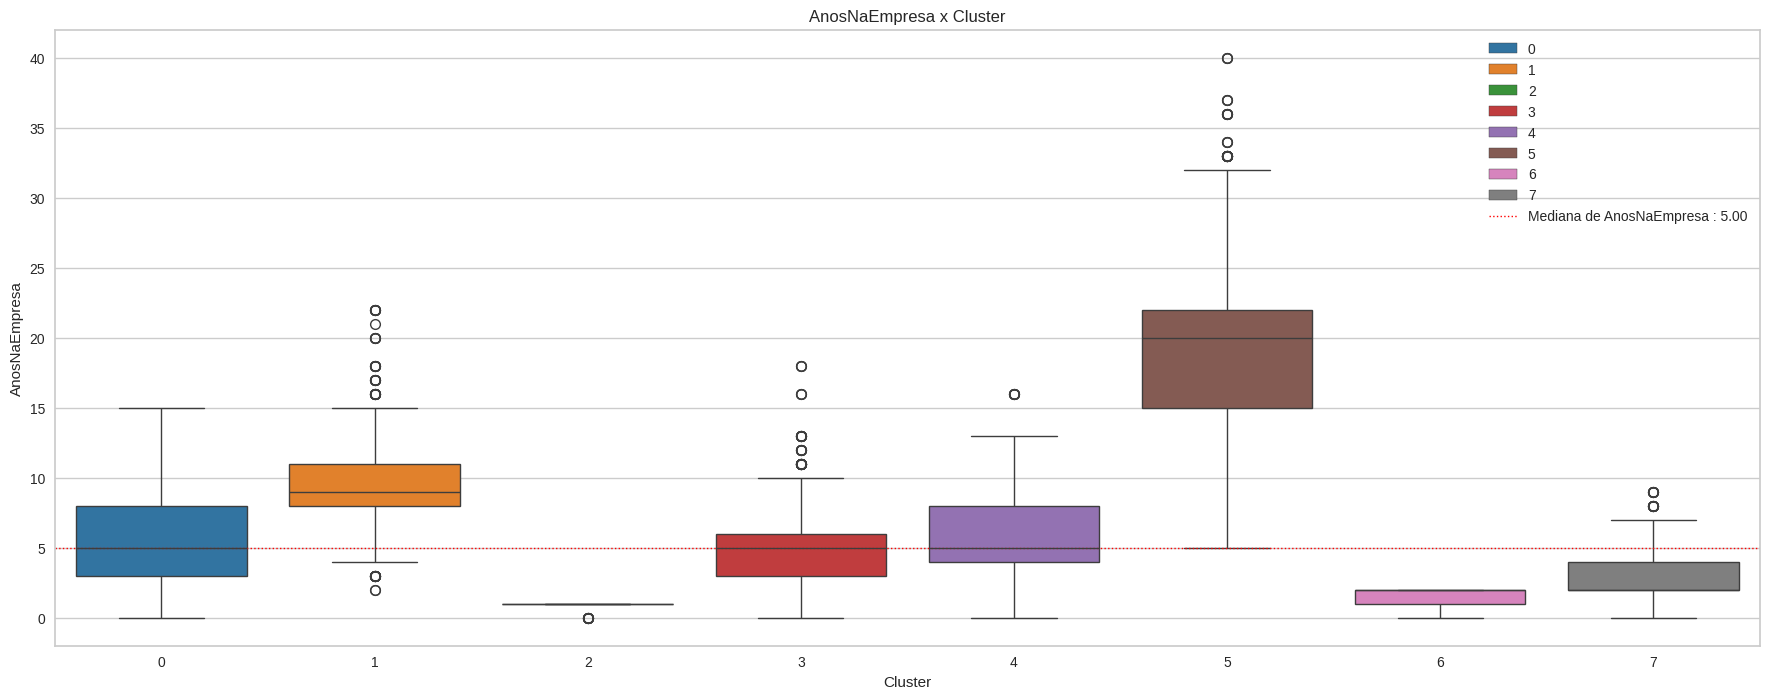

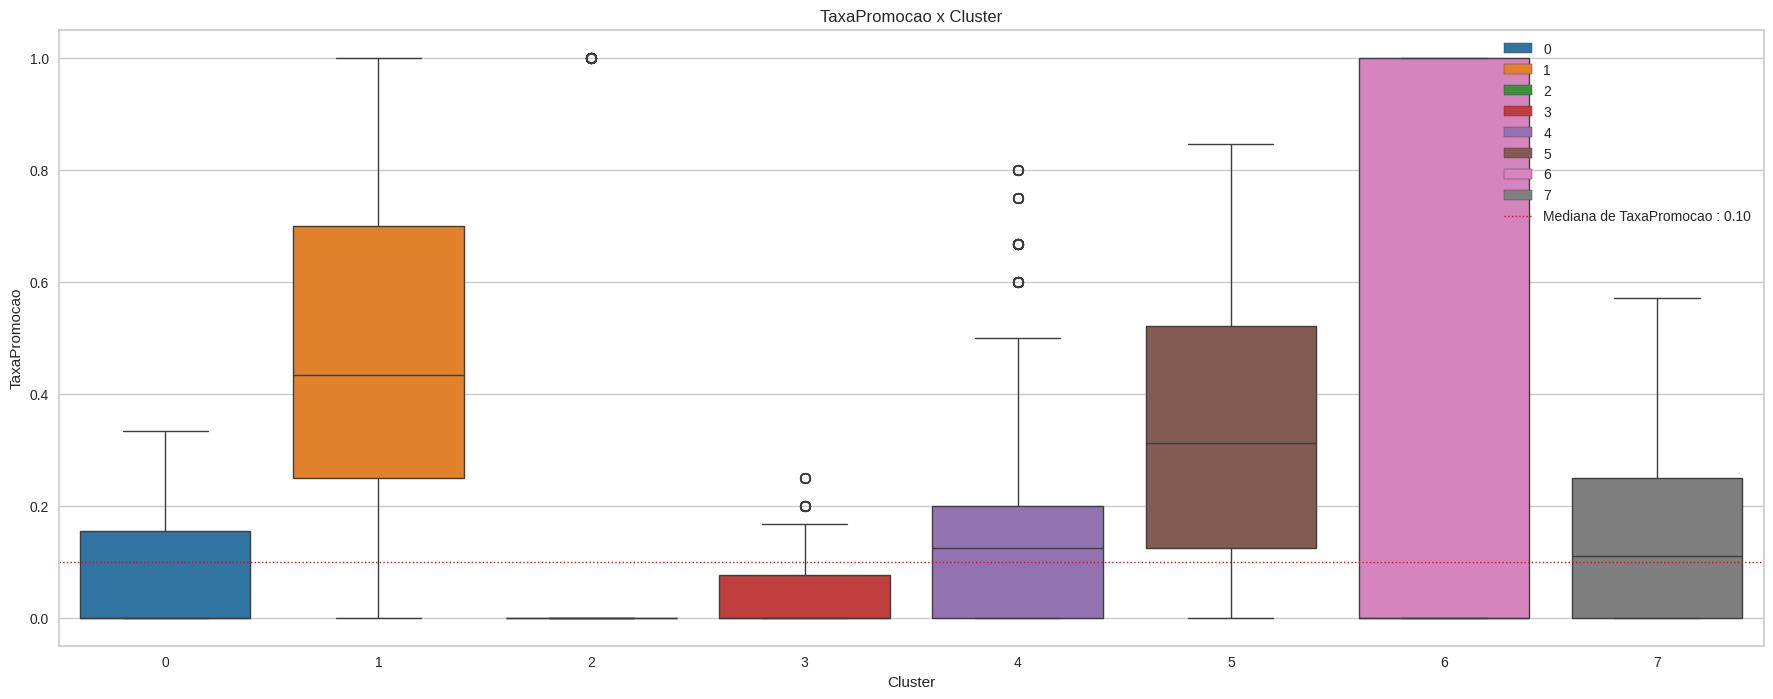

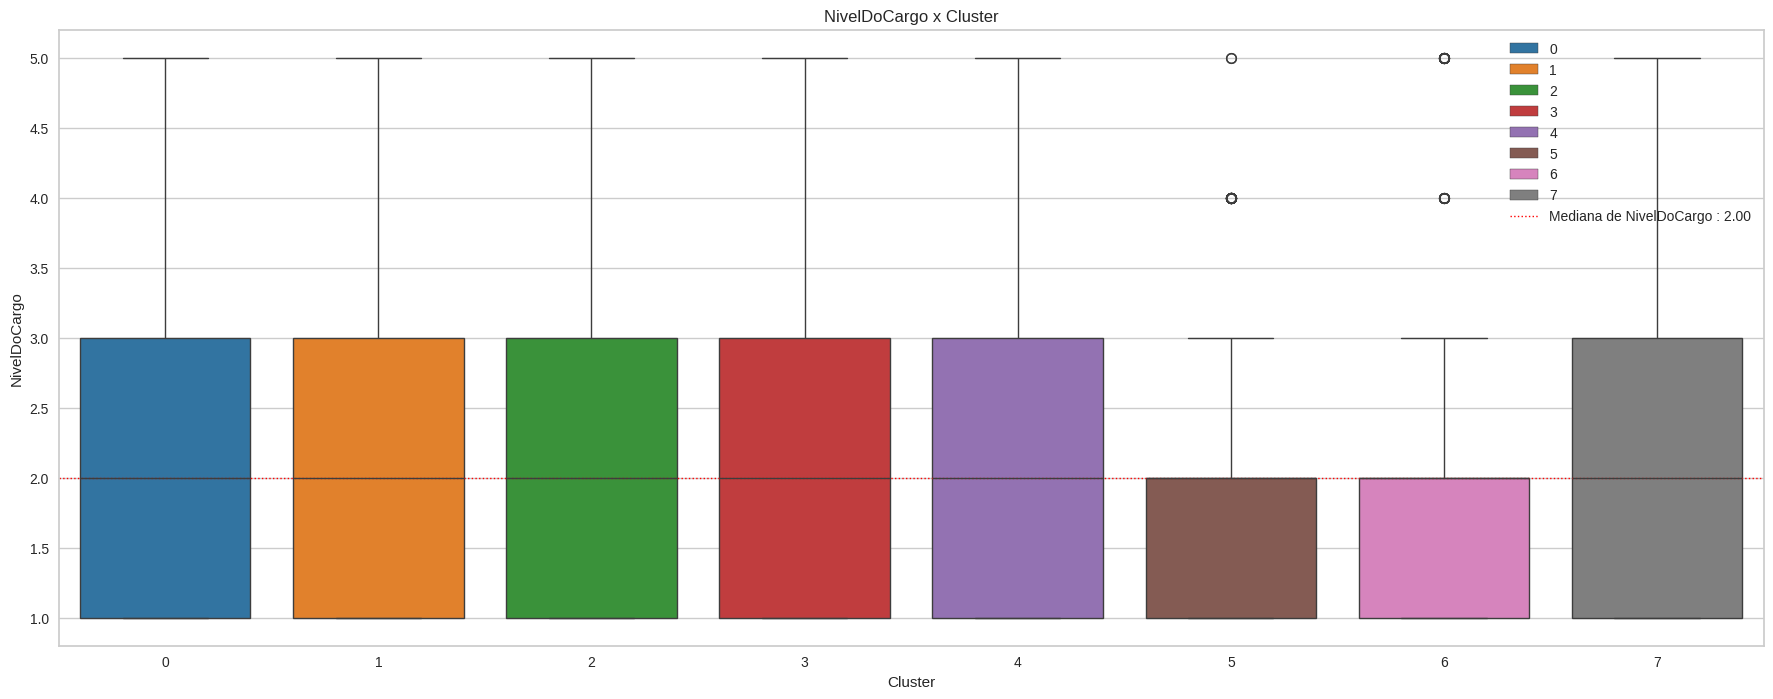

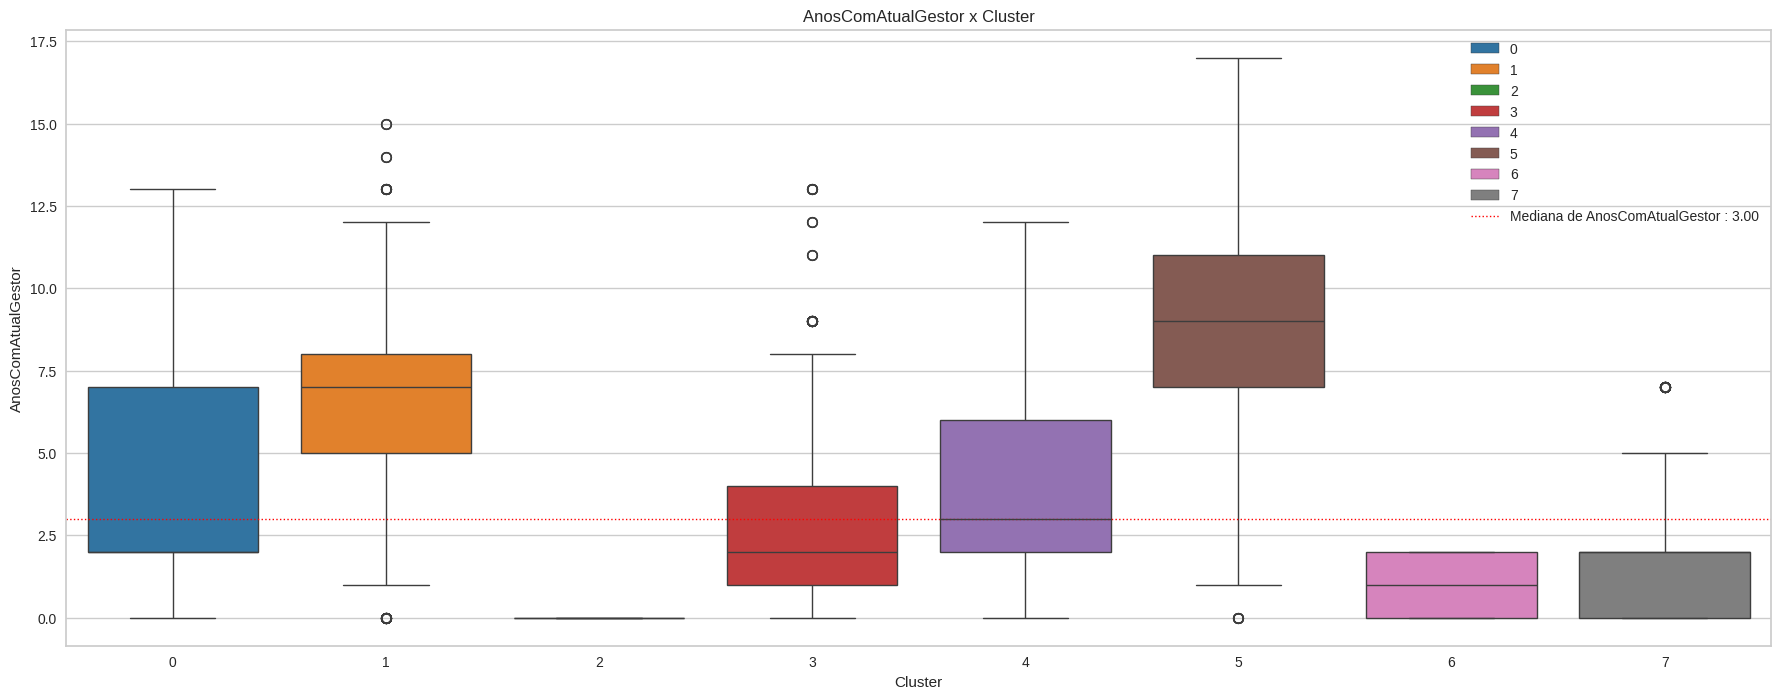

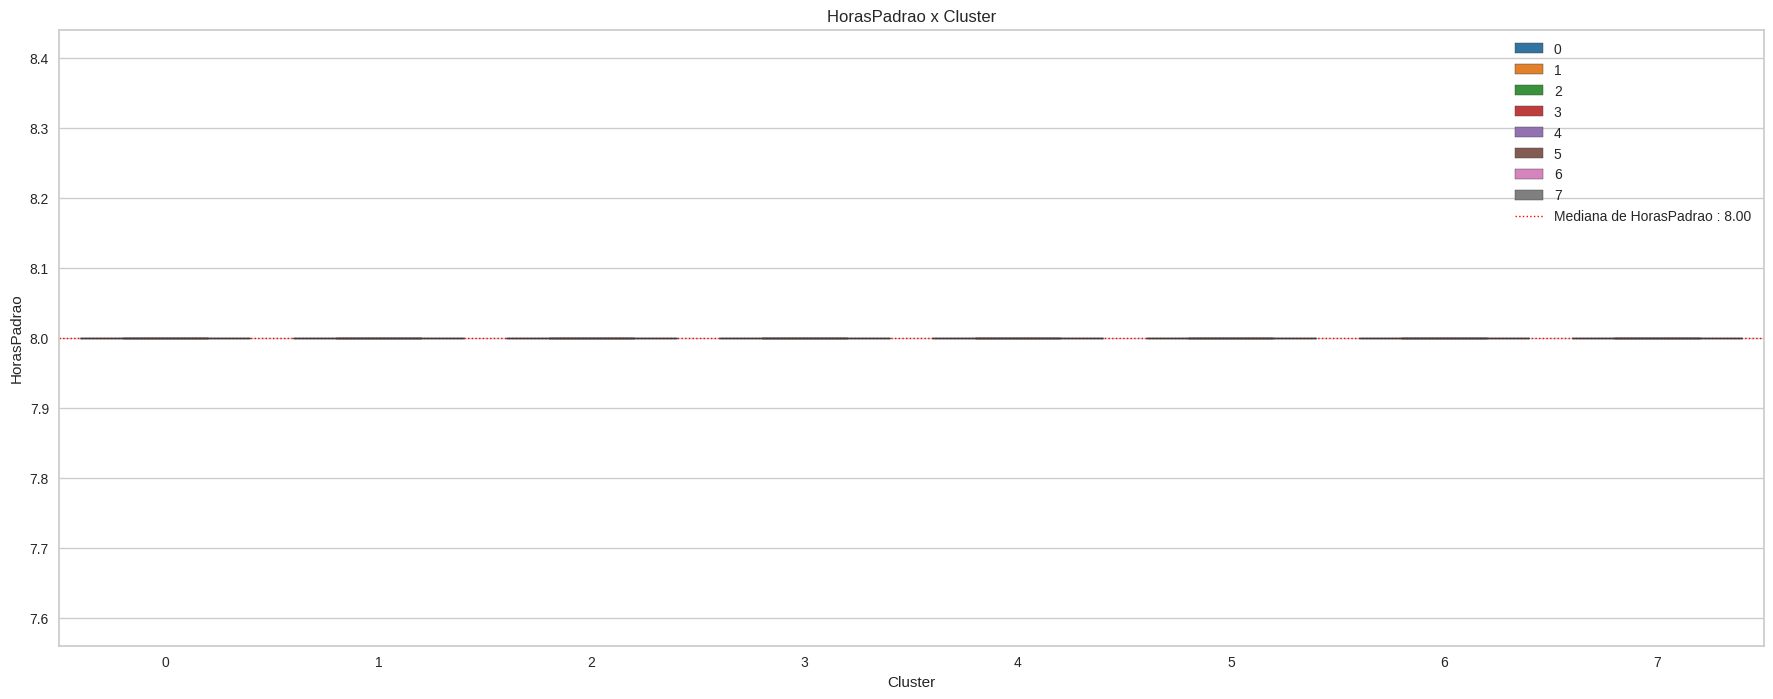

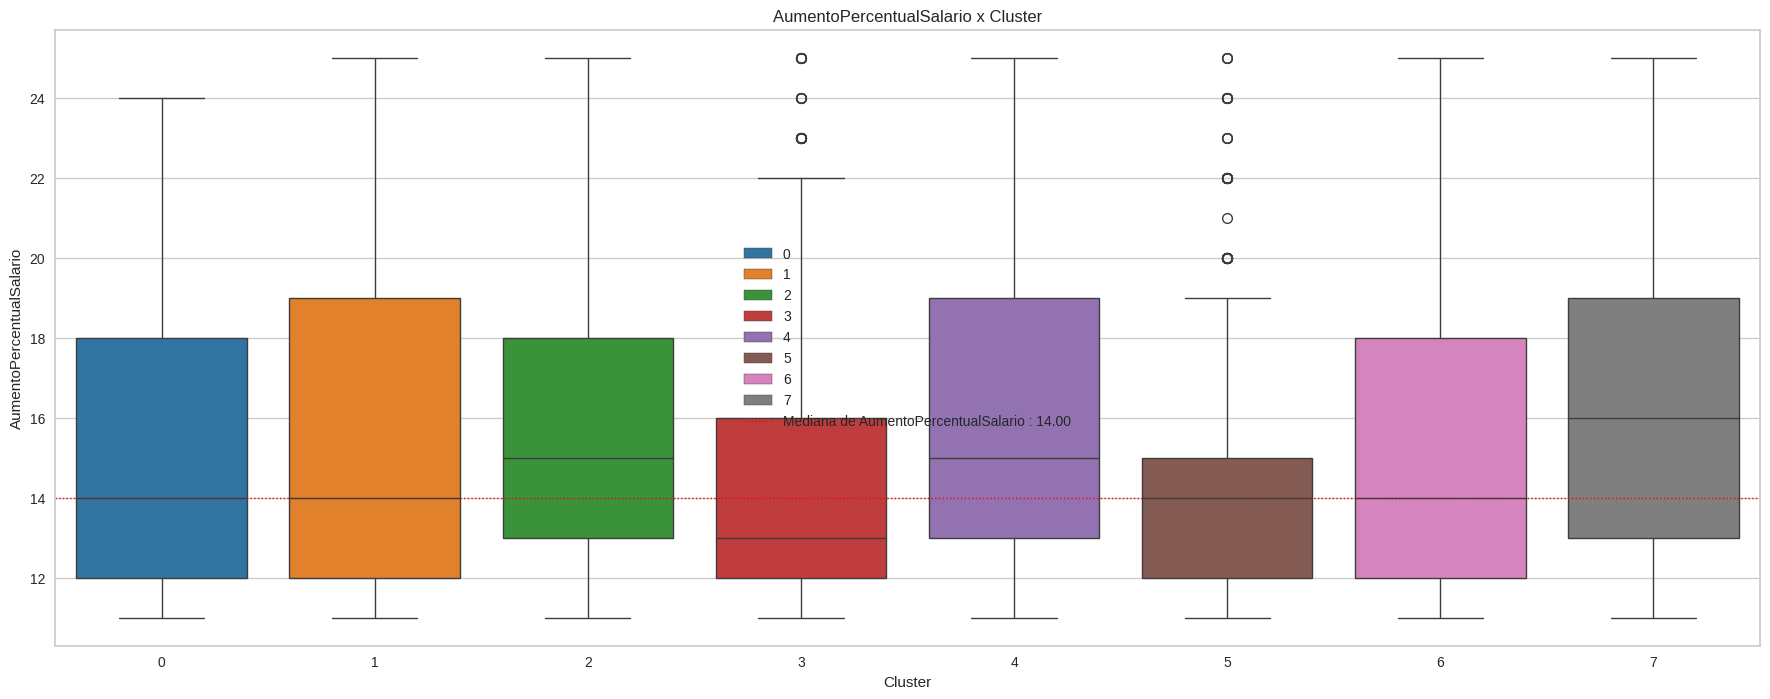

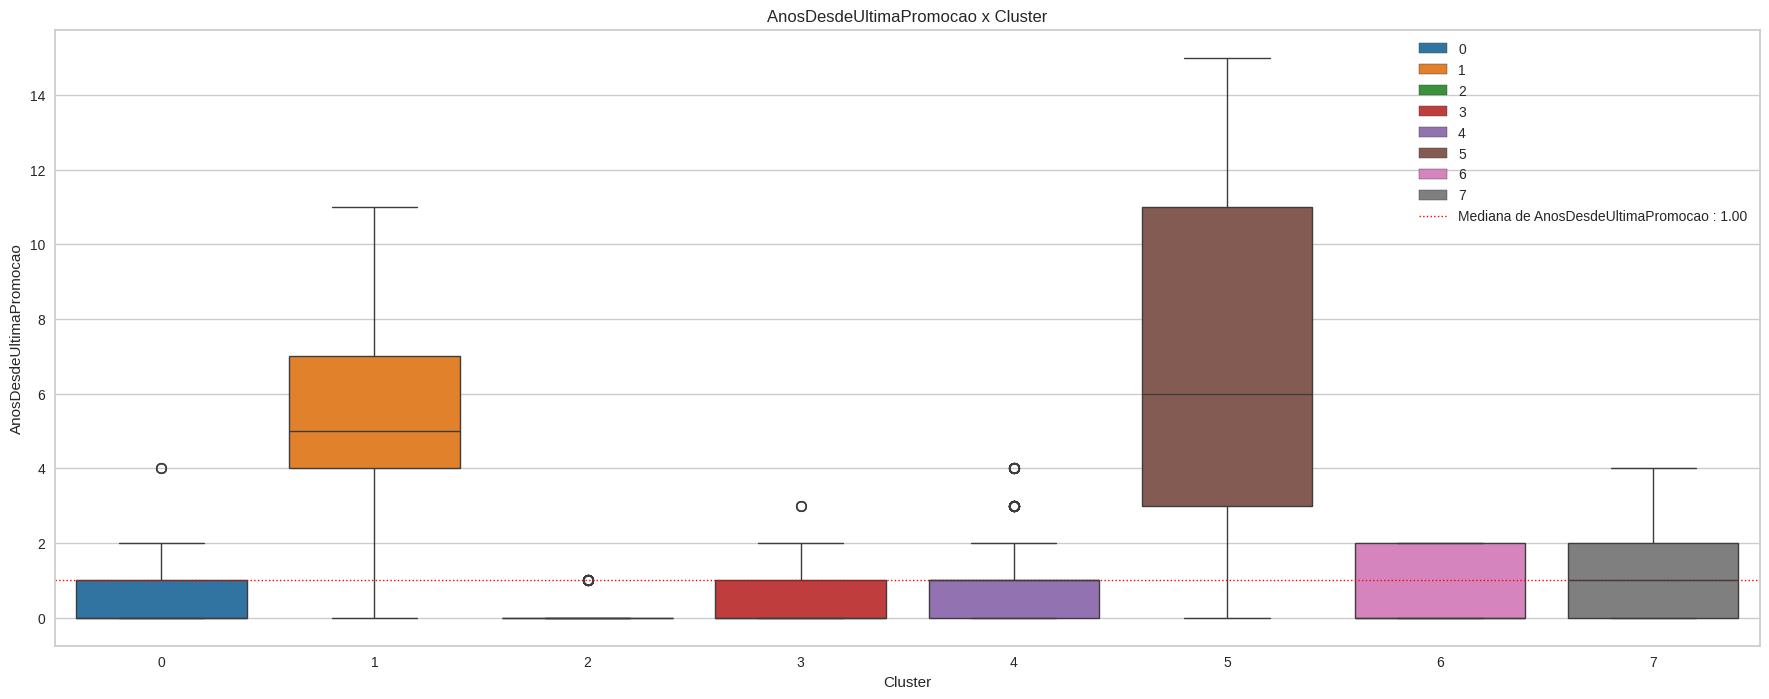

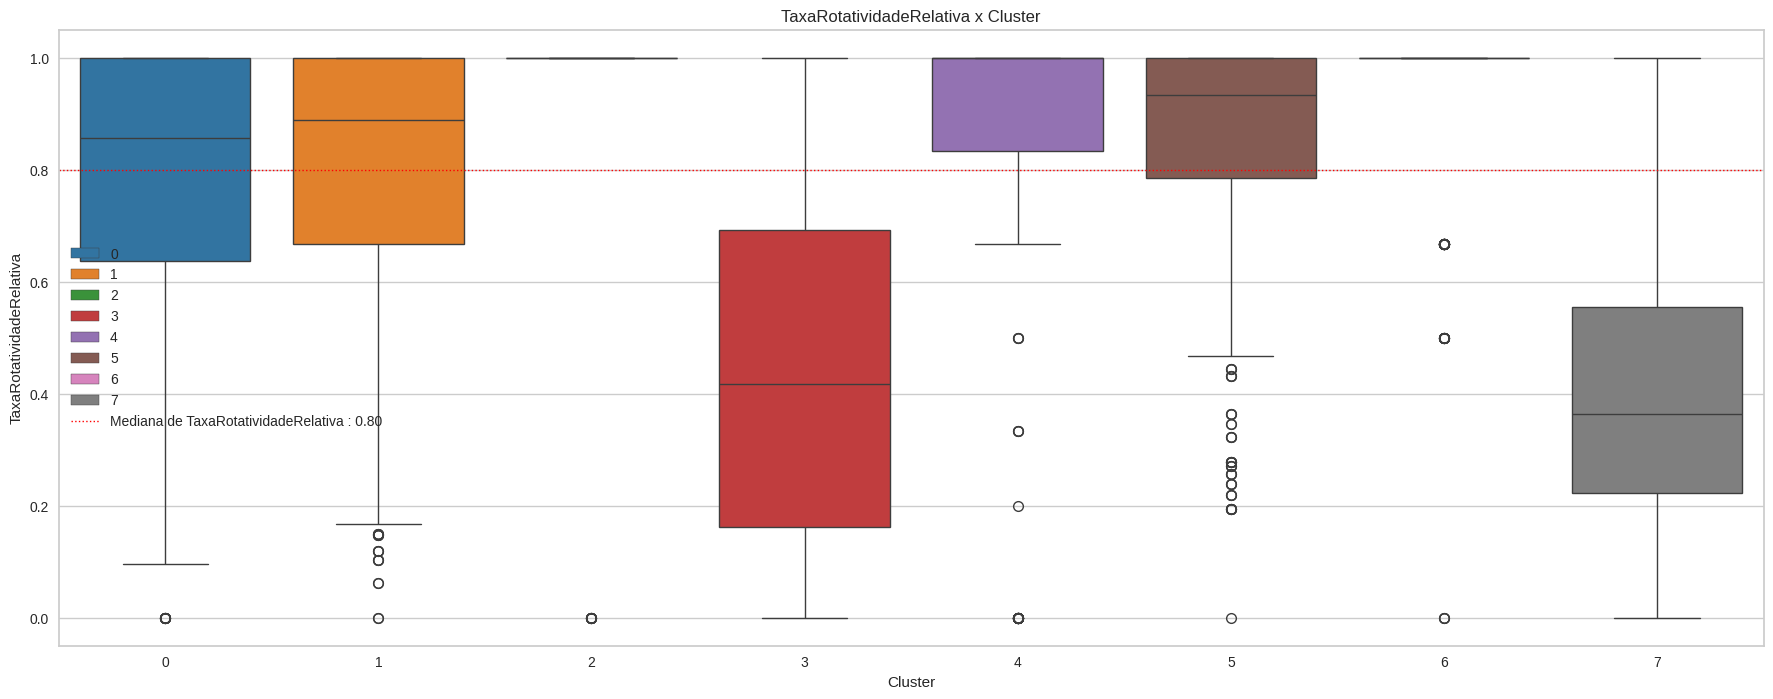

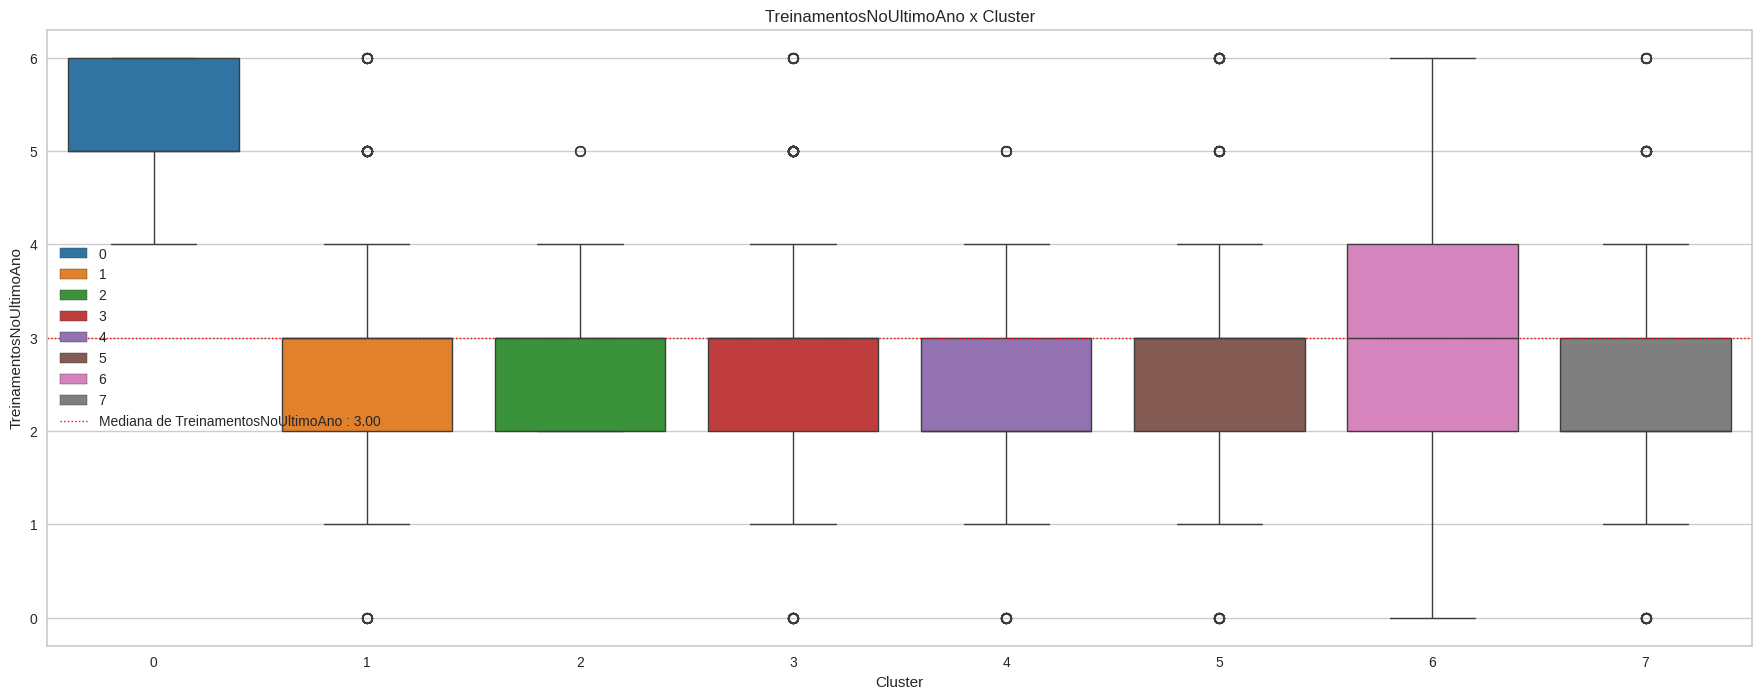

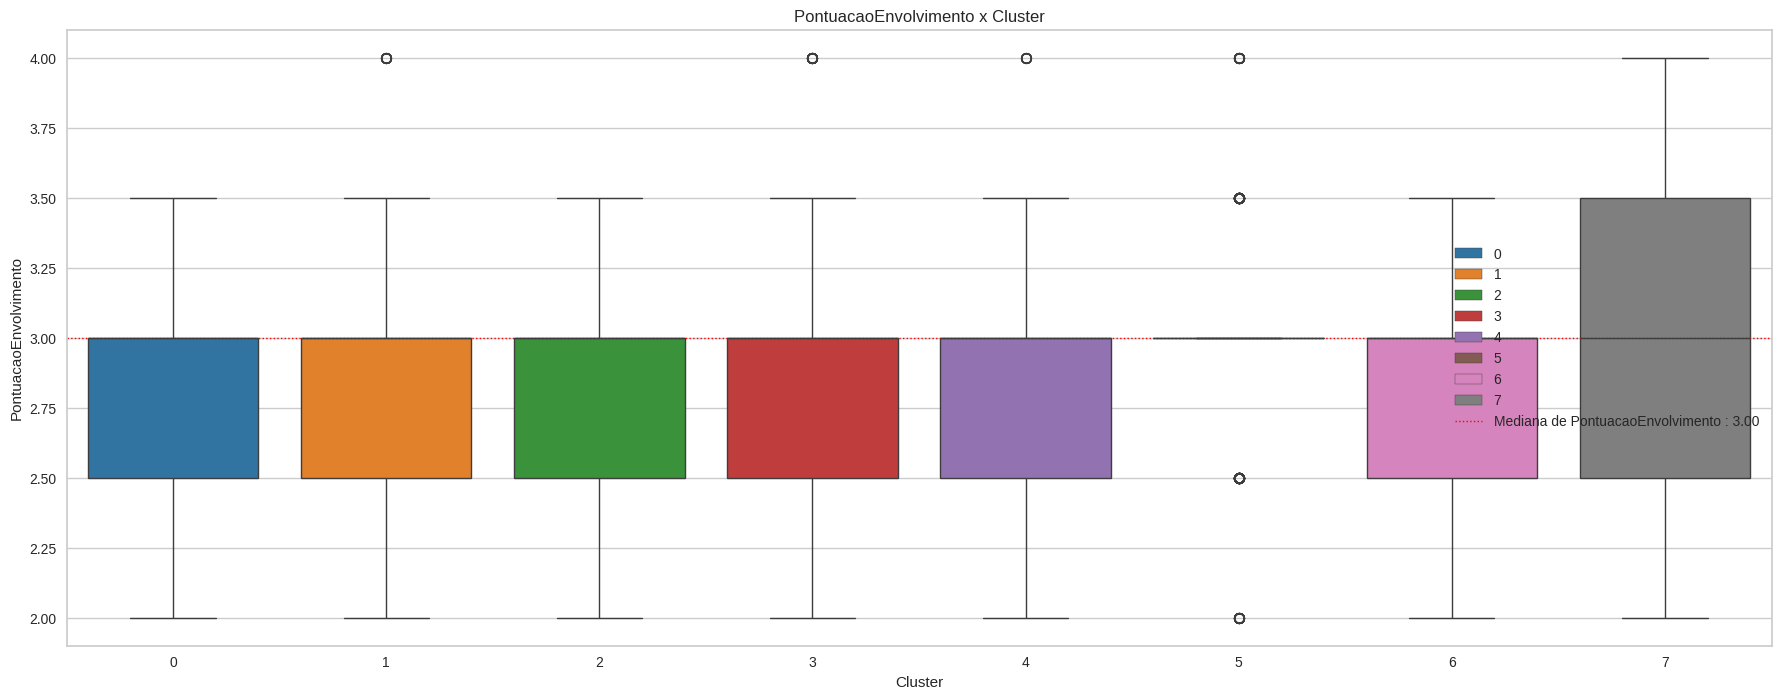

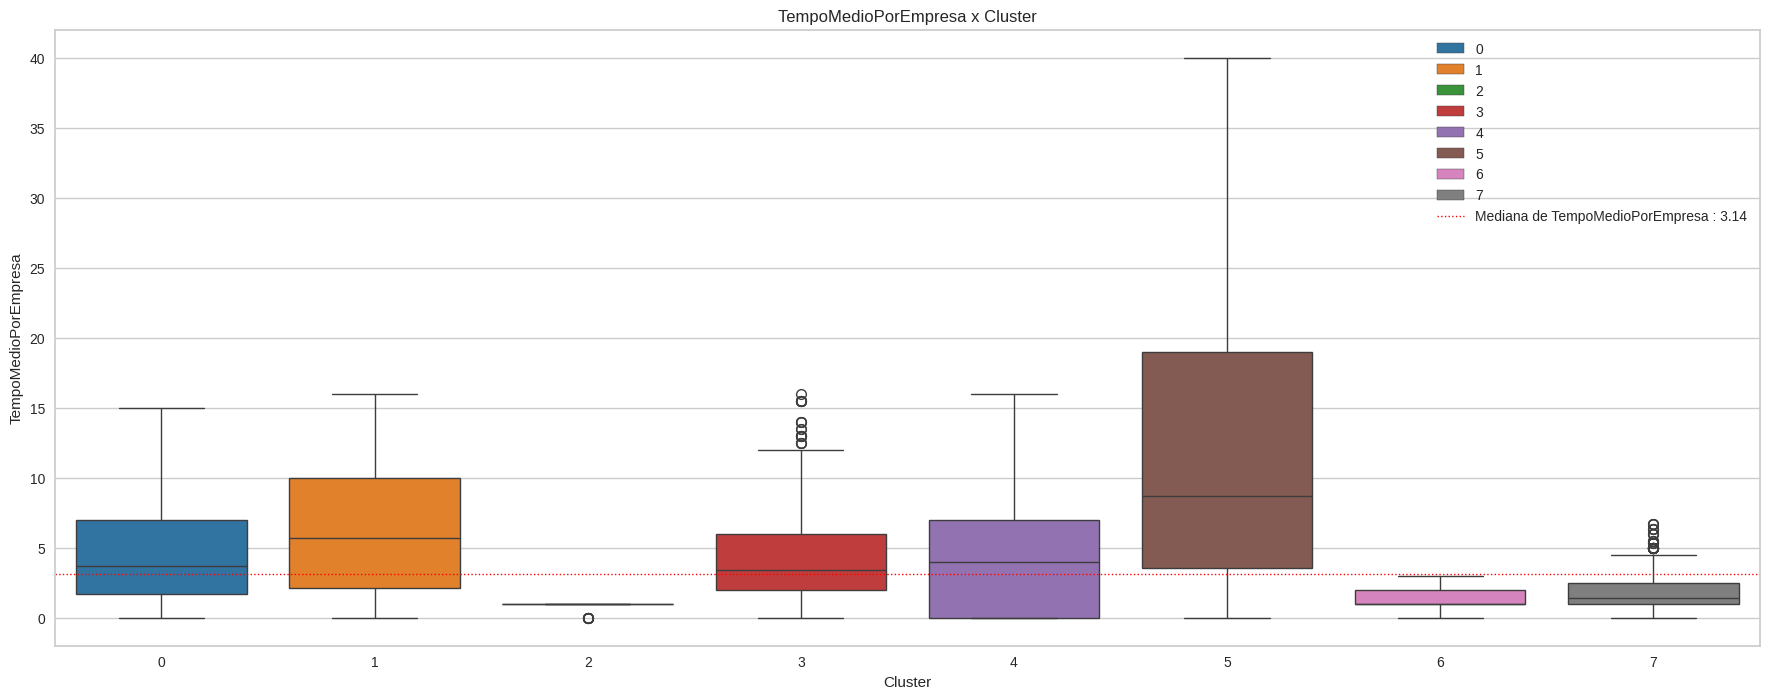

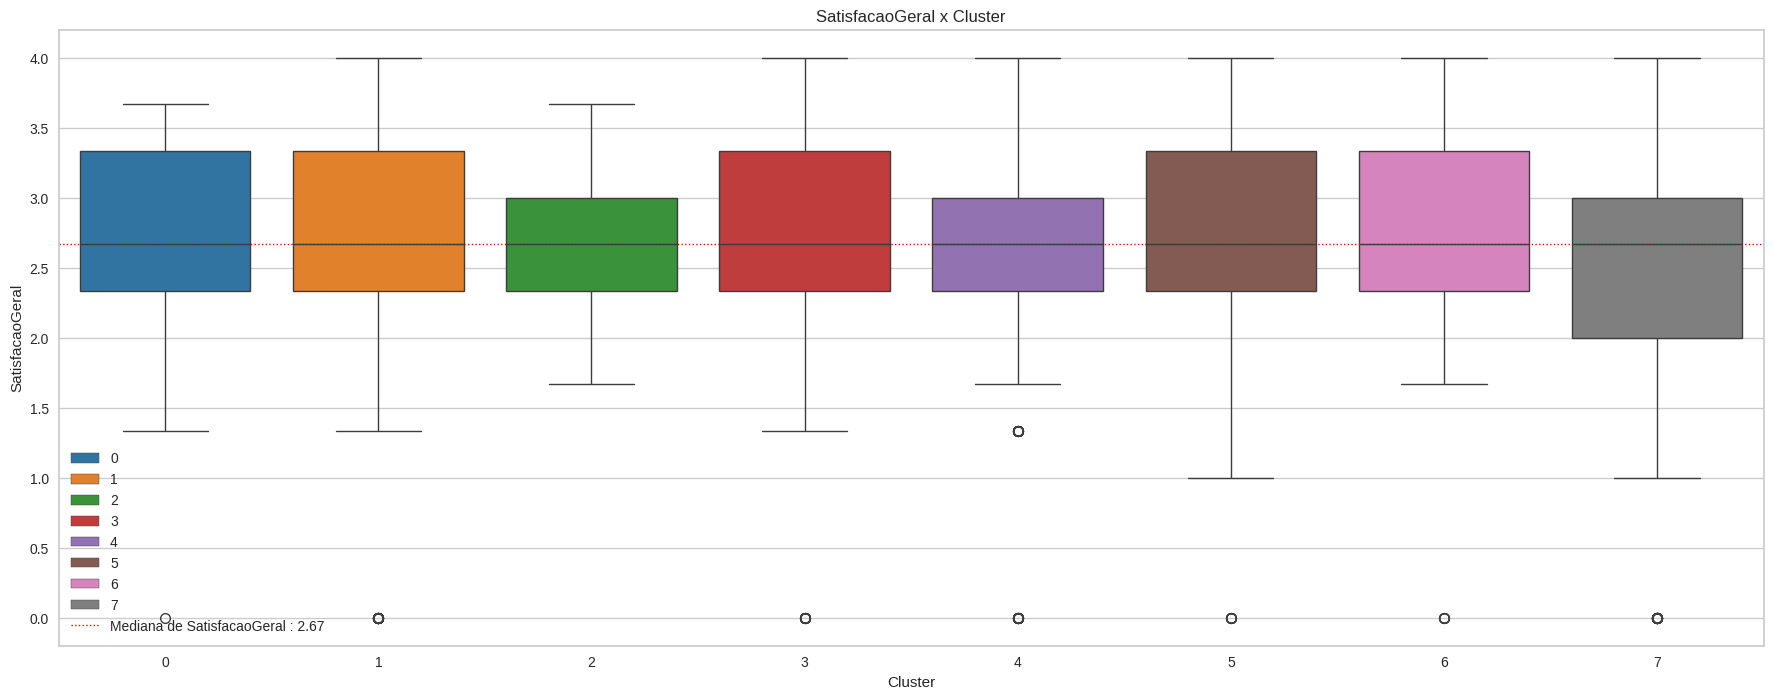

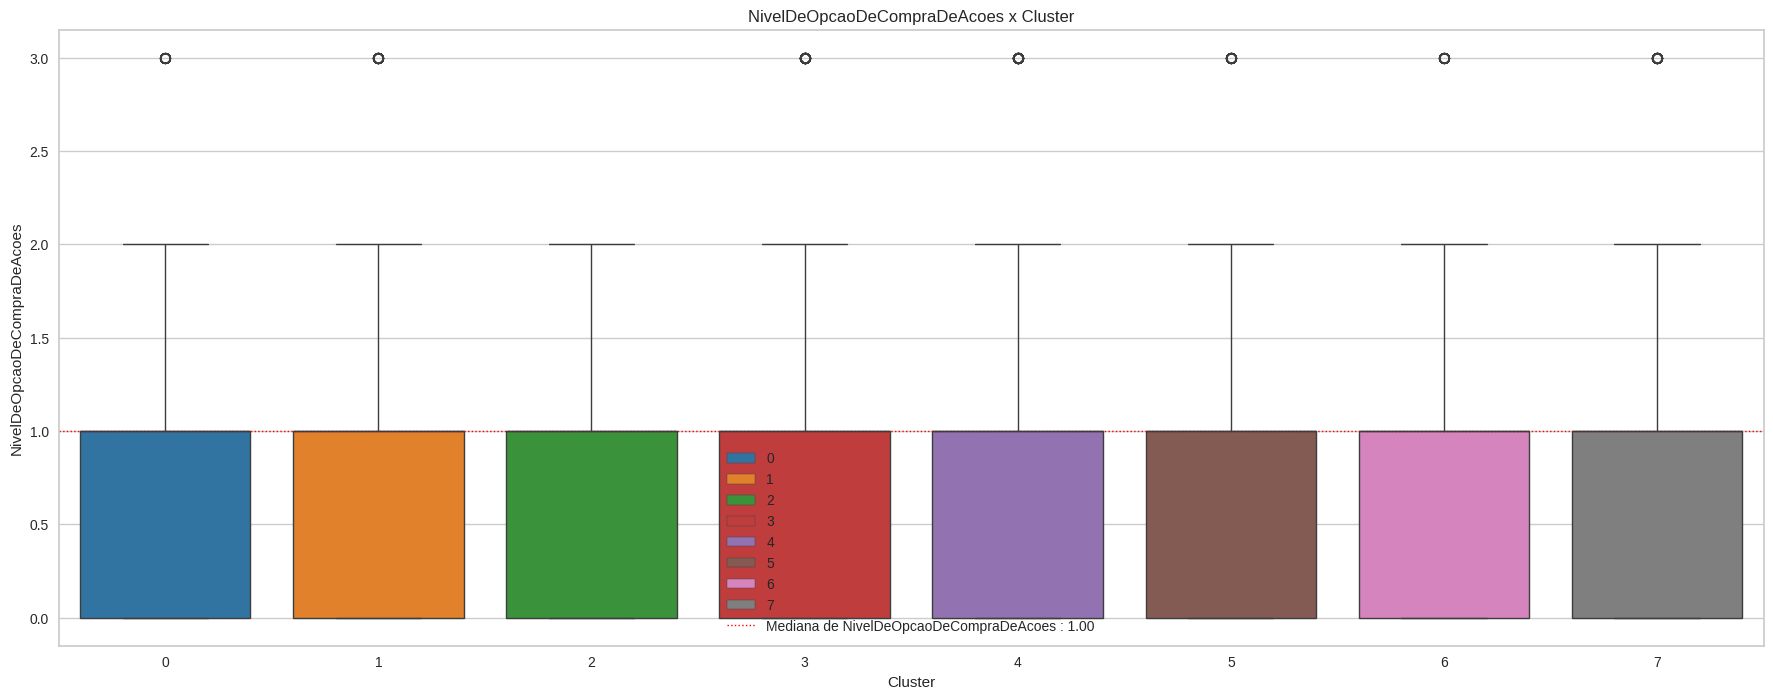

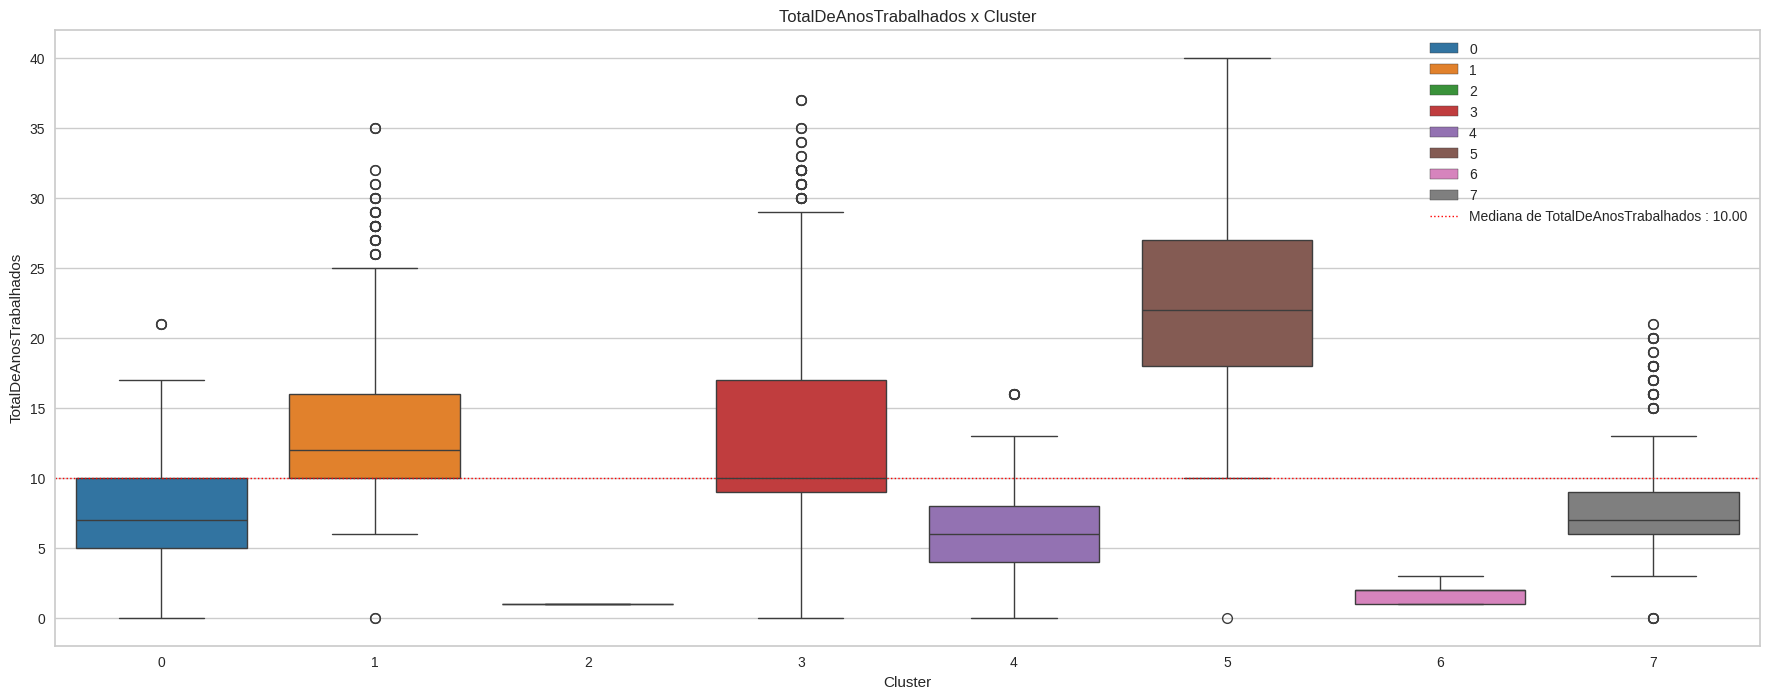

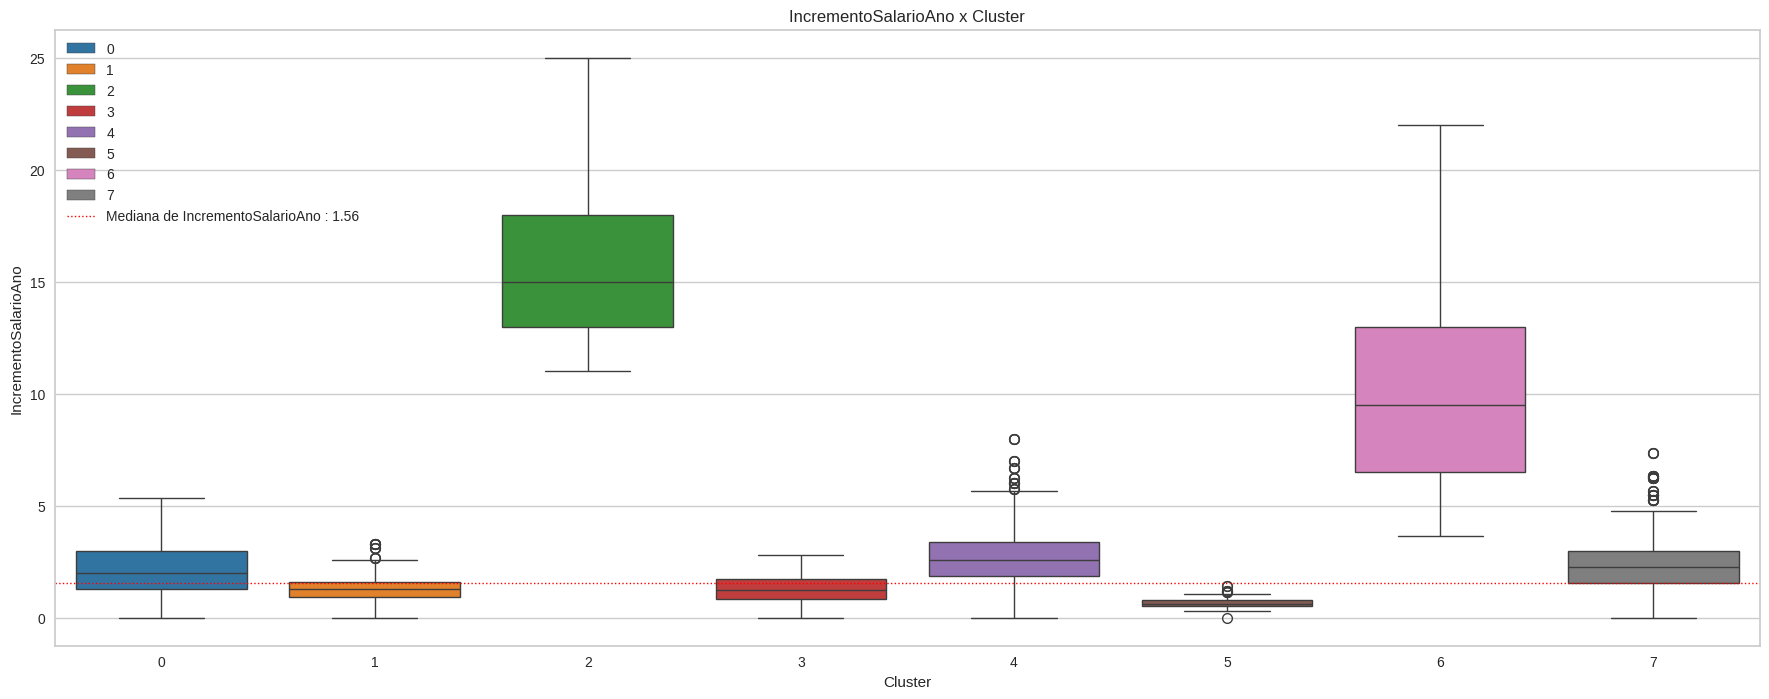

In [ ]:
vars_numericas = list(set(df_publico.columns) - set(vars_categoricas) - set(['ContagemDeEmpregados','Rotatividade','MaiorDe18','TARGET','Cluster','IDDoEmpregado']))
for var in vars_numericas:
  plt.figure(figsize=(22, 8))
  pl=sns.boxplot(x=df_publico["Cluster"], y=df_publico[var], palette= pal, hue=df_publico["Cluster"])

  mediana = df_publico[var].median()
  # Adicionando uma linha indicando a média da variável de rotatividade
  text = f'Mediana de {var} :'+' {:.2f}'.format(mediana)
  plt.axhline(mediana, color='red', linestyle='dotted', linewidth=1, label=text)

  pl.set_title(f"{var} x Cluster")
  plt.legend()
  plt.show()

Insights gerados:
* Taxa de Promoção:
  * O (cluster 2) que possui maior rotatividade apresenta uma taxa de promoção menor que a mediana.
  * Podemos observar que este cenário não se repete nos clusters (6 e 7) que possuem também uma alta taxa de rotatividade.
* Horas de Trabalho:
  * Aparentemente não há diferença significativa entre a quantidade de horas trabalhadas por cluster.
* Tempo Médio por Empresa:
  * Nos clusters (2, 6 e 7) onde possuímos as maiores taxas de rotatividade, podemos observar que a grande maioria tende a ficar menos de 3 anos em uma empresa.
* Anos na Empresa:
  * Observando os Anos do funcionário na atual empresa, podemos reafirmar o Tempo Médio por Empresa, uma vez que podemos rever o padrão, estes funiconários não tendem a passar mais de 5 anos na empresa.
* Números de Empresa:
  * Observando os Clusters (2 e 6), podemos ver que todos os funcionários contidos neles estão no inicio de sua carreira, tendo passado por uma ou nenhuma outra empresa.
* Idade:
  * Cerca de 75% do público contido no Cluster 2, possui menos de 30 anos, são jovens no inicio de sua carreira.
* Anos desde a última promoção:
  * Os clusters 2, 3 e 5 apresentam a menor quantidade de anos desde a última promoção. Indicando que os funcionários pertencentes a estes clusters foram promovidos recentemente;
  * O cluster 6 se destaca em possuir a maior quantidade de anos desde a última promoção.
* Treinamentos no último ano:
  * Todos os clusters apresentam o mesmo intervalo interquartil apresentando mediana igual a 3 com exceção do cluster 4 que apresenta mediana igual a 2.
* Idade:
  * Os colaboradores de maior idade estão concentrados no cluster 6;
  * As medianas de idade dos funcionários pertencentes aos cluster 3 e 5 são 39 e 29 anos respectivamente;
  * Os funcionários mais novos estão concentrados no cluster 5.
* Total de anos trabalhados:
  * Os colaboradores com maior quantidade de anos trabalhados estão concentrados no cluster 6;
  * Os funcionários com menor quantidade de anos trabalhados estão concentrados no cluster 5;
  * As medianas de anos trabalhados para os funcionários contidos nos cluster 0 e 3 são próximas.
* Número de empresas (Número total de empresas pelas quais o funcionário passou):
  * O cluster 3 apresentou a maior mediana indicando que os funcionários que passaram pela maior quantidade de empresas tendem a estar concentrados neste cluster;
  * O cluster 0 (menor taxa de rotatividade) possui a menor mediana, significando que neste cluster se concentram colaboradores que passaram por uma menor quantidade de empresas;
  * O cluster com maior taxa de rotatividade apresentou mediana igual ao dobro do cluster com menor taxa de rotatividade.
* Anos com atual gestor:
  * Os clusters 2 e 3 concentram funcionários que tiveram a menor quantidade de anos com o atual gestor;
  * Os clusters 1 e 6 concentram funcionários que tiveram a maior quantidade de anos com o atual gestor;
  * A mediana da quantidade de anos com atual gestor é bem superior no cluster 0 do que no cluster 3.
* Anos na empresa:
  * Os funcionários com maior quantidade de anos na empresa estão concentrados no cluster 6;
  * Os colaboradores com menor quantidade de anos na empresa estão concentrados no cluster 3;

# Considerações Finais

### Principais insights:

* Os clusters com maior taxa de rotatividade são os 2, 6 e 7.

* As principais características do **cluster 3** são:

  * 62,1% são do gênero masculino e 37,9% feminino;
  * A maioria dos funcionários realiza viagens raras;
  * 68,5% dos funcionários possuem Satisfação com Ambiente igual ou superior a 3;
  * Possui os maiores valores percentuais de Satisfação com o Trabalho igual a 1 e 2;
  * 60,5% dos funcionários apresentam Satisfação com o Trabalho igual ou inferior a 2;
  * 68,4% dos funcionários tiveram nível de envolvimento no trabalho igual ou superior a 3;
  * Tem a maior concentração percentual de funcionários com nível de educação abaixo do superior;
  * Tempo médio por empresa bem abaixo da mediana, que é de 5 anos;
  * Apresenta maior incremento salarial por ano, estando aproximadamente 7x acima da mediana;
  * Funcionários apresentam anos na empresa muito abaixo da mediana de 5 anos;
  * Estão bem abaixo do total de anos trabalhados pelos demais; a mediana para este valor é de 10 anos;
  * Maior concentração de funcionários possui menos de 30 anos.

* As principais características do **cluster 6** são:

  * 63,4% são do gênero masculino e 36,6% feminino;
  * Apresenta maior percentual de funcionários que realizam viagens raras;
  * Apresenta maior percentual de funcionários com Satisfação de Ambiente igual a 4;
  * 71,8% dos funcionários apresentam Satisfação com o Trabalho igual ou superior a 3;
  * Possui o maior percentual de pessoas com Envolvimento no Trabalho igual a 3;
  * 71,8% dos funcionários apresentam Envolvimento no Trabalho igual ou superior a 3;
  * Possui o maior percentual de funcionários com Bacharel;
  * 74,7% dos funcionários têm nível de ensino igual ou superior a Bacharel;
  * Tempo médio por empresa bem abaixo da mediana, que é de 5 anos;
  * Funcionários apresentam anos na empresa abaixo da mediana de 5 anos;
  * Estão bem abaixo do total de anos trabalhados pelos demais; a mediana para este valor é de 10 anos;
  * Maior concentração de funcionários possui menos de 36 anos;
  * Todos os funcionários tiveram alguma promoção nos últimos 2 anos;
  * Grande concentração de funcionários possui Nível de Cargo igual a 2.

* As principais características do **cluster 7** são:

  * Possui o maior percentual de gênero feminino no cluster;
  * 56,3% são do gênero masculino e 43,7% do gênero feminino;
  * Apresenta maior percentual de funcionários com Satisfação de Ambiente igual a 1;
  * 45,8% dos funcionários apresentam Satisfação com o Ambiente igual ou inferior a 2;
  * Apresenta maior percentual de funcionários com Satisfação no Trabalho igual a 0;
  * 42,5% dos funcionários apresentam Satisfação no Trabalho inferior a 2;
  * 71,8% dos funcionários apresentam Envolvimento no Trabalho igual ou superior a 3;
  * Possui o maior percentual de funcionários com Avaliação de Desempenho igual a 4;
  * 74,7% dos funcionários têm nível de ensino igual ou superior a Bacharel;
  * Maior concentração dos funcionários presentes no cluster tem mais de 30 anos;
  * Maior concentração de funcionários teve alguma promoção nos últimos 2 anos;
  * A maior parte dos funcionários já trabalhou em mais de 3 empresas;
  * Maior concentração de funcionários possui menos de 5 anos na empresa;
  * Maior concentração dos funcionários possui mais de 5 anos no mercado de trabalho;
  * Grande concentração dos funcionários possui Renda Mensal maior que a mediana.


# Acionáveis

* **Cluster 3:**
  * **Programas de Desenvolvimento Educacional:** Oferecer subsídios ou parcerias com instituições de ensino para que os funcionários possam melhorar seus níveis educacionais. Focar em treinamentos internos relevantes para o crescimento profissional dentro da organização.
  * **Iniciativas de Retenção de Talentos:** Desenvolver políticas de retenção como reconhecimento de marcos de tempo de serviço ou bonificações por desempenho, visando aumentar o engajamento e a satisfação dos funcionários.
  * **Melhorias no Ambiente de Trabalho:** Conduzir pesquisas internas para entender as causas da insatisfação e, com base nisso, implementar melhorias na infraestrutura, promover um ambiente mais inclusivo, e adotar programas de bem-estar e colaboração.

* **Cluster 6:**
  * **Reconhecimento e Recompensas:** Criar programas de reconhecimento para valorizar funcionários que apresentam altos níveis de desempenho e envolvimento no trabalho. Isso pode incluir promoções, prêmios ou bônus baseados em resultados.
  * **Pesquisas de Engajamento:** Realizar pesquisas regulares de satisfação e engajamento para entender melhor as necessidades dos funcionários e implementar melhorias contínuas com base nos resultados obtidos.
  * **Suporte ao Bem-Estar:** Desenvolver programas que ofereçam suporte à saúde mental e ao bem-estar, especialmente para funcionários que lidam com viagens frequentes, proporcionando recursos como sessões de aconselhamento ou suporte familiar.
  * **Flexibilidade no Trabalho:** Oferecer opções como horários flexíveis e trabalho remoto para reduzir o estresse das viagens e melhorar a satisfação geral dos funcionários.
  * **Iniciativas para Viagens Eficientes:** Investir em recursos e comodidades que tornem as viagens de trabalho mais confortáveis, como apoio logístico, acesso a espaços de trabalho remotos e benefícios em programas de fidelidade de viagens.
  * **Desenvolvimento de Liderança e Mentoria:** Focar em programas de mentoria e desenvolvimento de liderança para funcionários com alto potencial, promovendo seu crescimento na empresa e melhorando a retenção de talentos.

* **Cluster 7:**
  * **Foco no Engajamento Feminino:** Desenvolver iniciativas para melhorar a satisfação das funcionárias, como programas de desenvolvimento de carreira focados em diversidade e inclusão, e políticas que incentivem o equilíbrio entre trabalho e vida pessoal.
  * **Programas de Incentivo ao Desempenho:** Criar sistemas de bonificação e reconhecimento que incentivem a melhoria do desempenho, focando em áreas onde há maior insatisfação.
  * **Apoio ao Desenvolvimento de Carreira:** Implementar programas de coaching e desenvolvimento de habilidades que ajudem os funcionários a progredirem em suas carreiras, especialmente aqueles que estão no início de suas jornadas.
  * **Promoções e Crescimento Interno:** Monitorar os funcionários que estão há mais tempo na empresa e oferecer planos de carreira que incentivem a permanência, como promoções internas ou mudanças laterais para outras áreas.
  * **Fortalecimento da Cultura Organizacional:** Realizar eventos e iniciativas que promovam um ambiente de trabalho positivo e colaborativo, aumentando o senso de pertencimento e reduzindo a rotatividade.